# TiVo

### Focus
TiVo value propositon and how to measure it

### Qs
- does the study evaluate consumer attitudes well?
- what are strengths/ weaknesses of the present approach?
- would you do anything diff in the market research project? what would you have done and what would you expect to find?
- why segment in the first place? best way?
- how do diff kinds of research relate?

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn import preprocessing

In [3]:
# import and check data
df = pd.read_csv("TiVoData.csv")
df = df.drop(df.index[len(df)-1])
df = df.drop(df.index[len(df)-1])
df = df.drop(df.index[len(df)-1])
dfE = pd.read_csv("TiVoData.csv")
dfE = dfE.drop(dfE.index[len(dfE)-1])
dfE = dfE.drop(dfE.index[len(dfE)-1])
dfE = dfE.drop(dfE.index[len(dfE)-1])
df.shape

(1000, 16)

In [4]:
df.describe()

ID  Annual Income (x1000 $)          Age  \
count  1000.000000              1000.000000  1000.000000   
mean    500.500000                39.007000    48.344000   
std     288.819436                30.985627    17.865409   
min       1.000000                21.000000    18.000000   
25%     250.750000                29.000000    32.000000   
50%     500.500000                33.000000    49.000000   
75%     750.250000                48.250000    63.000000   
max    1000.000000               730.000000    80.000000   

       Monthly Electronics Spend  Monthly Household Spend  \
count                1000.000000              1000.000000   
mean                   30.962000                94.241000   
std                    17.049787                67.173128   
min                     7.000000                10.000000   
25%                    17.000000                47.000000   
50%                    25.500000                73.000000   
75%                    42.000000               124.000000   
max                    88.000000               390.000000   

       Purchasing Frequency (every x months)  TV Viewing (hours/day)  
count                            1000.000000             1000.000000  
mean                               22.986000                2.370000  
std                                13.878776                2.910252  
min                                 1.000000                0.000000  
25%                                11.000000                1.000000  
50%                                22.000000                1.000000  
75%                                35.000000                2.000000  
max                                48.000000               14.000000

In [5]:
# convert string factors to type: category

dfE["Gender"] = dfE["Gender"].astype("category")
dfE["Marital Status"] = dfE["Marital Status"].astype("category")
dfE["Work Status"] = dfE["Work Status"].astype("category")
dfE["Education"] = dfE["Education"].astype("category")
dfE["Location"] = dfE["Location"].astype("category")
dfE["Purchasing Decision-maker"] = dfE["Purchasing Decision-maker"].astype("category")
dfE["Purchasing Location"] = dfE["Purchasing Location"].astype("category")
dfE["Technology Adoption"] = dfE["Technology Adoption"].astype("category")
dfE["Favorite feature"] = dfE["Favorite feature"].astype("category")
dfE.dtypes

ID                                        float64
Gender                                   category
Marital Status                           category
Work Status                              category
Education                                category
Annual Income (x1000 $)                   float64
Age                                       float64
Location                                 category
Purchasing Decision-maker                category
Purchasing Location                      category
Monthly Electronics Spend                 float64
Monthly Household Spend                   float64
Purchasing Frequency (every x months)     float64
Technology Adoption                      category
TV Viewing (hours/day)                    float64
Favorite feature                         category
dtype: object

In [6]:
# encode qualitative factors

dfE["Gender"] = dfE["Gender"].cat.codes
dfE["Marital Status"] = dfE["Marital Status"].cat.codes
dfE["Work Status"] = dfE["Work Status"].cat.codes
dfE["Education"] = dfE["Education"].cat.codes
dfE["Location"] = dfE["Location"].cat.codes
dfE["Purchasing Decision-maker"] = dfE["Purchasing Decision-maker"].cat.codes
dfE["Purchasing Location"] = dfE["Purchasing Location"].cat.codes
dfE["Technology Adoption"] = dfE["Technology Adoption"].cat.codes
dfE["Favorite feature"] = dfE["Favorite feature"].cat.codes
dfE.head()

ID  Gender  Marital Status  Work Status  Education  \
0  1.0       1               0            1          3   
1  2.0       1               1            0          3   
2  3.0       1               0            1          0   
3  4.0       1               0            0          2   
4  5.0       0               1            0          3   

   Annual Income (x1000 $)   Age  Location  Purchasing Decision-maker  \
0                     49.0  30.0         8                          0   
1                     46.0  36.0         0                          1   
2                     58.0  66.0        20                          0   
3                     51.0  78.0        31                          0   
4                     46.0  52.0        25                          1   

   Purchasing Location  Monthly Electronics Spend  Monthly Household Spend  \
0                    1                       35.0                    150.0   
1                    1                       35.0                    163.0   
2                    3                       64.0                    103.0   
3                    1                       33.0                    154.0   
4                    1                       45.0                    161.0   

   Purchasing Frequency (every x months)  Technology Adoption  \
0                                   13.0                    1   
1                                   26.0                    1   
2                                   13.0                    0   
3                                   22.0                    1   
4                                   47.0                    1   

   TV Viewing (hours/day)  Favorite feature  
0                     2.0                 2  
1                    10.0                 2  
2                     0.0                 4  
3                     5.0                 2  
4                     2.0                 2

In [7]:
corr = dfE.corr()**2
corr.style.background_gradient()

In [8]:
df.head()

ID  Gender Marital Status   Work Status Education  \
0  1.0    male        married  professional      none   
1  2.0    male         single          none      none   
2  3.0    male        married  professional        BA   
3  4.0    male        married          none       PhD   
4  5.0  female         single          none      none   

   Annual Income (x1000 $)   Age       Location Purchasing Decision-maker  \
0                     49.0  30.0        Florida                    family   
1                     46.0  36.0        Alabama                    single   
2                     58.0  66.0  Massachusetts                    family   
3                     51.0  78.0       New York                    family   
4                     46.0  52.0        Montana                    single   

         Purchasing Location  Monthly Electronics Spend  \
0  mass-consumer electronics                       35.0   
1  mass-consumer electronics                       35.0   
2           specialty stores                       64.0   
3  mass-consumer electronics                       33.0   
4  mass-consumer electronics                       45.0   

   Monthly Household Spend  Purchasing Frequency (every x months)  \
0                    150.0                                   13.0   
1                    163.0                                   26.0   
2                    103.0                                   13.0   
3                    154.0                                   22.0   
4                    161.0                                   47.0   

  Technology Adoption  TV Viewing (hours/day)  \
0                late                     2.0   
1                late                    10.0   
2               early                     0.0   
3                late                     5.0   
4                late                     2.0   

                             Favorite feature  
0  saving favorite shows to watch as a family  
1  saving favorite shows to watch as a family  
2                               time shifting  
3  saving favorite shows to watch as a family  
4  saving favorite shows to watch as a family

In [9]:
df.dtypes

ID                                       float64
Gender                                    object
Marital Status                            object
Work Status                               object
Education                                 object
Annual Income (x1000 $)                  float64
Age                                      float64
Location                                  object
Purchasing Decision-maker                 object
Purchasing Location                       object
Monthly Electronics Spend                float64
Monthly Household Spend                  float64
Purchasing Frequency (every x months)    float64
Technology Adoption                       object
TV Viewing (hours/day)                   float64
Favorite feature                          object
dtype: object

In [10]:
#### Age and TV Viewing analysis

print("Young + Light")
yl= df.loc[(df["Age"] <= 30) & (df["TV Viewing (hours/day)"] <= 2)]
print("% of market size: ", round(len(yl)/len(df),2))
print("most appealing feature: ", yl["Favorite feature"].mode()[0])
print("avg annual income: ", round(yl["Annual Income (x1000 $)"].mean(),2))
print("purchasing decision maker: ", yl["Purchasing Decision-maker"].mode()[0])
print("monthly electronics spend: ", round(yl["Monthly Electronics Spend"].mean(),2))
print("tech adoption: ", yl["Technology Adoption"].mode()[0])
print("stores shopped for electronics: ", yl["Purchasing Location"].mode()[0])

print("____")

print("Old + Light")
ol= df.loc[(df["Age"] > 30) & (df["TV Viewing (hours/day)"] <= 2)]
print("% of market size: ", round(len(ol)/len(df),2))
print("most appealing feature: ", ol["Favorite feature"].mode()[0])
print("avg annual income: ", round(ol["Annual Income (x1000 $)"].mean(),2))
print("purchasing decision maker: ", ol["Purchasing Decision-maker"].mode()[0])
print("monthly electronics spend: ", round(ol["Monthly Electronics Spend"].mean(),2))
print("tech adoption: ", ol["Technology Adoption"].mode()[0])
print("stores shopped for electronics: ", ol["Purchasing Location"].mode()[0])

print("____")

print("Young + Heavy")
yh= df.loc[(df["Age"] <= 30) & (df["TV Viewing (hours/day)"] > 2)]
print("% of market size: ", round(len(yh)/len(df),2))
print("most appealing feature: ", yh["Favorite feature"].mode()[0])
print("avg annual income: ", round(yh["Annual Income (x1000 $)"].mean(),2))
print("purchasing decision maker: ", yh["Purchasing Decision-maker"].mode()[0])
print("monthly electronics spend: ", round(yh["Monthly Electronics Spend"].mean(),2))
print("tech adoption: ", yh["Technology Adoption"].mode()[0])
print("stores shopped for electronics: ", yh["Purchasing Location"].mode()[0])

print("____")

print("Old + Heavy")
oh= df.loc[(df["Age"] > 30) & (df["TV Viewing (hours/day)"] > 2)]
print("% of market size: ", round(len(oh)/len(df),2))
print("most appealing feature: ", oh["Favorite feature"].mode()[0])
print("avg annual income: ", round(oh["Annual Income (x1000 $)"].mean(),2))
print("purchasing decision maker: ", oh["Purchasing Decision-maker"].mode()[0])
print("monthly electronics spend: ", round(oh["Monthly Electronics Spend"].mean(),2))
print("tech adoption: ", oh["Technology Adoption"].mode()[0])
print("stores shopped for electronics: ", oh["Purchasing Location"].mode()[0])


Young + Light
% of market size:  0.14
most appealing feature:  programming/interactive features
avg annual income:  34.04
purchasing decision maker:  single
monthly electronics spend:  30.88
tech adoption:  early
stores shopped for electronics:  discount
____
Old + Light
% of market size:  0.63
most appealing feature:  schedule control
avg annual income:  39.03
purchasing decision maker:  family
monthly electronics spend:  28.05
tech adoption:  early
stores shopped for electronics:  retail
____
Young + Heavy
% of market size:  0.09
most appealing feature:  programming/interactive features
avg annual income:  31.91
purchasing decision maker:  single
monthly electronics spend:  34.6
tech adoption:  early
stores shopped for electronics:  retail
____
Old + Heavy
% of market size:  0.14
most appealing feature:  saving favorite shows to watch as a family
avg annual income:  48.13
purchasing decision maker:  family
monthly electronics spend:  41.73
tech adoption:  late
stores shopped for elec

In [11]:
#### Age and TV Viewing analysis
print(yl['Favorite feature'].value_counts()/yl['Favorite feature'].count())

print(ol['Favorite feature'].value_counts()/ol['Favorite feature'].count())

print(yh['Favorite feature'].value_counts()/yh['Favorite feature'].count())

print(oh['Favorite feature'].value_counts()/oh['Favorite feature'].count())

programming/interactive features              0.379562
cool gadget                                   0.240876
time shifting                                 0.204380
schedule control                              0.167883
saving favorite shows to watch as a family    0.007299
Name: Favorite feature, dtype: float64
schedule control                              0.313291
cool gadget                                   0.308544
time shifting                                 0.305380
saving favorite shows to watch as a family    0.072785
Name: Favorite feature, dtype: float64
programming/interactive features              0.876404
saving favorite shows to watch as a family    0.123596
Name: Favorite feature, dtype: float64
saving favorite shows to watch as a family    1.0
Name: Favorite feature, dtype: float64


In [12]:
#### Age and TV Viewing analysis
print(yl['Purchasing Decision-maker'].value_counts()/yl['Purchasing Decision-maker'].count())

print(ol['Purchasing Decision-maker'].value_counts()/ol['Purchasing Decision-maker'].count())

print(yh['Purchasing Decision-maker'].value_counts()/yh['Purchasing Decision-maker'].count())

print(oh['Purchasing Decision-maker'].value_counts()/oh['Purchasing Decision-maker'].count())

single    0.635036
family    0.364964
Name: Purchasing Decision-maker, dtype: float64
family    0.59019
single    0.40981
Name: Purchasing Decision-maker, dtype: float64
single    0.910112
family    0.089888
Name: Purchasing Decision-maker, dtype: float64
family    0.908451
single    0.091549
Name: Purchasing Decision-maker, dtype: float64


In [13]:
#### Age and TV Viewing analysis
print(yl['Favorite feature'].value_counts()/yl['Favorite feature'].count())

print(ol['Favorite feature'].value_counts()/ol['Favorite feature'].count())

print(yh['Favorite feature'].value_counts()/yh['Favorite feature'].count())

print(oh['Favorite feature'].value_counts()/oh['Favorite feature'].count())

programming/interactive features              0.379562
cool gadget                                   0.240876
time shifting                                 0.204380
schedule control                              0.167883
saving favorite shows to watch as a family    0.007299
Name: Favorite feature, dtype: float64
schedule control                              0.313291
cool gadget                                   0.308544
time shifting                                 0.305380
saving favorite shows to watch as a family    0.072785
Name: Favorite feature, dtype: float64
programming/interactive features              0.876404
saving favorite shows to watch as a family    0.123596
Name: Favorite feature, dtype: float64
saving favorite shows to watch as a family    1.0
Name: Favorite feature, dtype: float64


In [14]:
#### Age and TV Viewing analysis
print(round(np.std(yl['Monthly Electronics Spend']),2))

print(round(np.std(ol['Monthly Electronics Spend']),2))

print(round(np.std(yh['Monthly Electronics Spend']),2))

print(round(np.std(oh['Monthly Electronics Spend']),2))

15.54
18.99
4.68
5.63


In [15]:
#### Age and TV Viewing analysis
print(yl['Technology Adoption'].value_counts()/yl['Technology Adoption'].count())

print(ol['Technology Adoption'].value_counts()/ol['Technology Adoption'].count())

print(yh['Technology Adoption'].value_counts()/yh['Technology Adoption'].count())

print(oh['Technology Adoption'].value_counts()/oh['Technology Adoption'].count())

early    0.992701
late     0.007299
Name: Technology Adoption, dtype: float64
early    0.927215
late     0.072785
Name: Technology Adoption, dtype: float64
early    0.876404
late     0.123596
Name: Technology Adoption, dtype: float64
late    1.0
Name: Technology Adoption, dtype: float64


In [16]:
#### Age and TV Viewing analysis
print(yl['Purchasing Location'].value_counts()/yl['Purchasing Location'].count())

print(ol['Purchasing Location'].value_counts()/ol['Purchasing Location'].count())

print(yh['Purchasing Location'].value_counts()/yh['Purchasing Location'].count())

print(oh['Purchasing Location'].value_counts()/oh['Purchasing Location'].count())

discount                     0.394161
retail                       0.299270
specialty stores             0.197080
web (ebay)                   0.102190
mass-consumer electronics    0.007299
Name: Purchasing Location, dtype: float64
retail                       0.352848
discount                     0.348101
specialty stores             0.226266
mass-consumer electronics    0.072785
Name: Purchasing Location, dtype: float64
retail                       0.337079
web (ebay)                   0.325843
discount                     0.213483
mass-consumer electronics    0.123596
Name: Purchasing Location, dtype: float64
mass-consumer electronics    1.0
Name: Purchasing Location, dtype: float64


In [17]:
ol[ol["Annual Income (x1000 $)"] >500]


ol = ol[ol["Annual Income (x1000 $)"] < 500]


sb.pairplot(ol.loc[:, df.columns != 'ID'],hue = "Favorite feature")

NameError: name 'sb' is not defined

In [ ]:
ol[ol["Annual Income (x1000 $)"] >500]


ol = ol[ol["Annual Income (x1000 $)"] < 500]


sb.pairplot(ol.loc[:, df.columns != 'ID'],hue = "Purchasing Location")

In [ ]:
import seaborn as sb

sb.pairplot(df.loc[:, df.columns != 'ID'])

### observations

Annual income has 2 giant outliers

monthly electronics spend and monthly household spend sooo correlated
tv viewing high mode near 0 (v right skewed
monthly electronics spend more left skewed
)

In [ ]:
# remove outliers in annual income

dfE[dfE["Annual Income (x1000 $)"] >500]

dfT = dfE.drop(dfE.index[440])
dfT = dfT.drop(dfT.index[921])

print(dfT.loc[[921]])

In [ ]:
dfTx = df.drop(df.index[440])
dfTx = dfTx.drop(dfTx.index[921])

In [ ]:
plt.hist(df["Favorite feature"])

In [ ]:
import seaborn as sb

sb.pairplot(dfTx.loc[:, df.columns != 'ID'],hue = "Favorite feature")

In [ ]:
import seaborn as sb

sb.pairplot(ol.loc[:, df.columns != 'ID'],hue = "Favorite feature")

In [ ]:
dfTx = df.drop(df.index[440])
dfTx = dfTx.drop(dfTx.index[921])
dfTx.head()

In [ ]:
import seaborn as sb

sb.pairplot(dfTx.loc[:, df.columns != 'ID'],hue = "Purchasing Decision-maker")

In [ ]:
import seaborn as sb

sb.pairplot(dfTx.loc[:, df.columns != 'ID'],hue = "Purchasing Location")

In [ ]:
sb.catplot(x="Age",y="TV Viewing (hours/day)",hue="Favorite feature",data=dfTx)

In [ ]:
sb.catplot(x="TV Viewing (hours/day)",y="Age",hue="Favorite feature",data=dfTx)

In [ ]:
sb.catplot(x="Age",y="TV Viewing (hours/day)",hue="Annual Income (x1000 $)",data=dfSeg)

In [ ]:
sb.catplot(x="Age",y="TV Viewing (hours/day)",hue="Monthly Electronics Spend",data=dfSeg)

In [ ]:
sb.catplot(x="Age",y="TV Viewing (hours/day)",hue="Technology Adoption",data=dfSeg)

In [ ]:
sb.catplot(x="Age",y="TV Viewing (hours/day)",hue="Purchasing Location",data=dfSeg)

In [ ]:
sb.catplot(x="Purchasing Frequency (every x months)",y="Monthly Electronics Spend",hue="Favorite feature",data=dfTx)

In [ ]:
sb.catplot(x="Purchasing Frequency (every x months)",y="Monthly Electronics Spend",hue="Purchasing Location",data=dfTx)

In [ ]:
sb.catplot(x="Monthly Electronics Spend",y="Purchasing Frequency (every x months)",hue="Purchasing Location",data=dfTx)

### more obs
- wow income gap around 40k

#### + hues
- higher income tends to like saving shows
    - lower income tends to like programming/ interactive features
- generally every income likes schedule control tho: steady feature

- generally seems to be between the three features: saving fav shows/ schedules control/ programming featrrues
- TV Viewing and fav feature seems to correlate
    - high TV viewing people like saving fav shows to watch as a family
    - low TV viewing people like schedule control
    - mid tv viewing like schedule control
- purchasing frequency sort of increases w tv viewing as well
- monthly household/electronics spend only higher for low tv viewing people tho (scedule control)
- WOW age and tv viewing is clean
    - young and low tv ppl like programming/ interactive features
    - older low viewing ppl like schedule control
    - ppl above 30 all seem to like saving shows to watch as fam and have highest tv watching
household/electronics spend: schedule control - programming/interactive features - saving fav shows
purchasing frequency higher for saving facv shows
only younng people like programming interactive features

**tv viewing and age seems to be best segmentation**
   
    

    



In [ ]:
import statistics as st

st.median(df["Annual Income (x1000 $)"])

In [ ]:
import statistics as st

st.median(df["Monthly Electronics Spend"])

In [ ]:
import seaborn as sb

sb.pairplot(dfTx.loc[:, df.columns != 'ID'],hue = "Technology Adoption")

In [ ]:
dfSeg = dfTx

dfSeg.groupby(['Monthly Electronics Spend']).groups.keys()

In [ ]:
### dfSeg = dfTx
dfSeg["Annual Income (x1000 $)"] = dfSeg["Annual Income (x1000 $)"].replace({21: "low", 22: "low", 23: "low", 24: "low", 25: "low", 26: "low", 27: "low", 28: "low", 29: "low", 30:"low",31:"low",32:"low",33:"low",34:"high",35:"high",36:"high",37:"high",38:"high",39:"high",40:"high",41:"high",42:"high",43:"high",44:"high",45:"high",46:"high",47:"high",48:"high",49:"high",50:"high",51:"high",52:"high",53:"high",54:"high",55:"high",56:"high",57:"high",58:"high",59:"high",60:"high",61:"high",62:"high",63:"high",64:"high"})
dfSeg["Monthly Electronics Spend"] = dfSeg["Annual Income (x1000 $)"].replace({7: "low", 8: "low", 9: "low", 10: "low", 11: "low", 12: "low", 13: "low", 14: "low", 15: "low", 16:"low",17:"low",18:"low",19:"low",20:"low",21:"low", 22:"low", 23:"low", 24:"low",25:"low",26:"high",27:"high",28:"high",29:"high",30:"high",31:"high",32:"high",33:"high",34:"high", 35:"high",36:"high",37:"high",38:"high",39:"high",40:"high",41:"high",42:"high",43:"high",44:"high",45:"high",46:"high",47:"high",48:"high",49:"high",50:"high",51:"high",52:"high",53:"high",54:"high",55:"high",56:"high",57:"high",58:"high",59:"high",60:"high",61:"high",62:"high",63:"high",64:"high",65:"high",66:"high",67:"high",68:"high",69:"high",70:"high",71:"high",72:"high",73:"high",74:"high",75:"high",76:"high",77:"high",78:"high",79:"high",80:"high",81:"high",82:"high",83:"high",84:"high",85:"high",86:"high",87:"high",88:"high",89:"high"})
dfSeg.head()

In [ ]:
import seaborn as sb

sb.pairplot(dfSeg.loc[:, df.columns != 'ID'],hue = "Annual Income (x1000 $)")

In [ ]:
import seaborn as sb

sb.pairplot(dfSeg.loc[:, df.columns != 'ID'],hue = "Purchasing Decision-maker")

In [ ]:
import seaborn as sb

sb.pairplot(dfSeg.loc[:, df.columns != 'ID'],hue = "Monthly Electronics Spend")

In [ ]:
import seaborn as sb

sb.pairplot(dfSeg.loc[:, df.columns != 'ID'],hue = "Purchasing Location")

In [ ]:
dfT.head()

In [ ]:
import seaborn as sb

sb.pairplot(dfT[["Gender","Marital Status","Work Status","Education","Annual Income (x1000 $)", "Age", "Monthly Electronics Spend", "Technology Adoption", "Favorite feature"]])

### obs obs
- gap in monthly electronics spend matching gap in annual income
- why did i plot categorical data against categorical data thats dumb -_____-

In [ ]:
dfT.head()


In [ ]:
df.columns

In [18]:
dfTSB = dfE
dfTSB.drop(columns = ["Favorite feature"])

dfTSB["Favorite feature"] = df["Favorite feature"]

# remove outliers
dfTSB = dfTSB.drop(dfTSB.index[440])
dfTSB = dfTSB.drop(dfTSB.index[921])

In [19]:
dfTSB.head()

ID  Gender  Marital Status  Work Status  Education  \
0  1.0       1               0            1          3   
1  2.0       1               1            0          3   
2  3.0       1               0            1          0   
3  4.0       1               0            0          2   
4  5.0       0               1            0          3   

   Annual Income (x1000 $)   Age  Location  Purchasing Decision-maker  \
0                     49.0  30.0         8                          0   
1                     46.0  36.0         0                          1   
2                     58.0  66.0        20                          0   
3                     51.0  78.0        31                          0   
4                     46.0  52.0        25                          1   

   Purchasing Location  Monthly Electronics Spend  Monthly Household Spend  \
0                    1                       35.0                    150.0   
1                    1                       35.0                    163.0   
2                    3                       64.0                    103.0   
3                    1                       33.0                    154.0   
4                    1                       45.0                    161.0   

   Purchasing Frequency (every x months)  Technology Adoption  \
0                                   13.0                    1   
1                                   26.0                    1   
2                                   13.0                    0   
3                                   22.0                    1   
4                                   47.0                    1   

   TV Viewing (hours/day)                            Favorite feature  
0                     2.0  saving favorite shows to watch as a family  
1                    10.0  saving favorite shows to watch as a family  
2                     0.0                               time shifting  
3                     5.0  saving favorite shows to watch as a family  
4                     2.0  saving favorite shows to watch as a family

LinAlgError: singular matrix

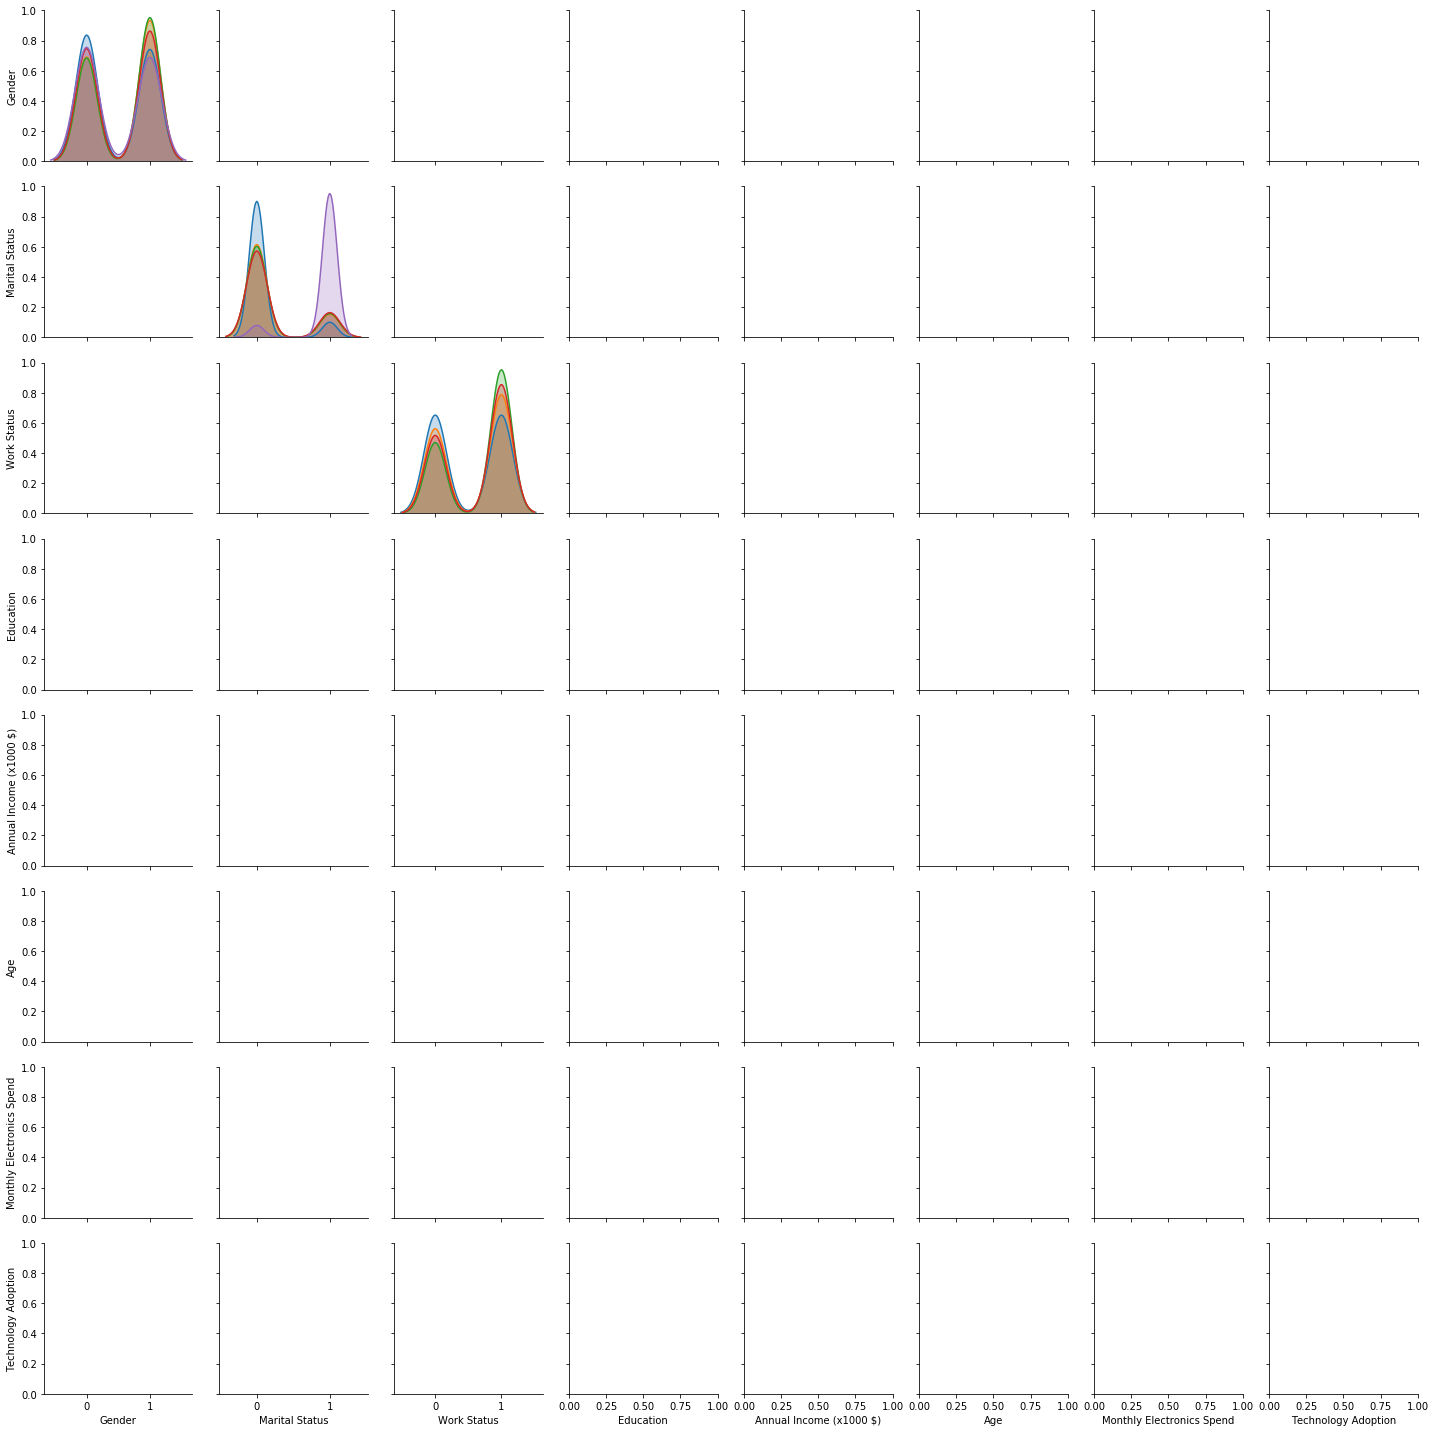

In [20]:
import seaborn as sb
sb.pairplot(dfTSB, vars=["Gender","Marital Status","Work Status","Education","Annual Income (x1000 $)", "Age", "Monthly Electronics Spend", "Technology Adoption"], hue="Favorite feature")

In [ ]:
import seaborn as sb
sb.pairplot(dfT, vars=["Gender","Marital Status","Work Status","Education","Annual Income (x1000 $)", "Age", "Monthly Electronics Spend", "Technology Adoption"], hue="Favorite feature")

In [ ]:
df.tail()

In [ ]:
dfE.tail()

In [ ]:
df.head()

In [ ]:
df['Annual Spending on Electronics'] = df['Monthly Electronics Spend'] * 12
df['Spending as % of Income'] = round(df['Annual Spending on Electronics'] / (df['Annual Income (x1000 $)']*1000),4)
df.head()

In [ ]:
dfTx['Annual Spending on Electronics'] = dfTx['Monthly Electronics Spend'] * 12
dfTx['Spending as % of Income'] = round(dfTx['Annual Spending on Electronics'] / (dfTx['Annual Income (x1000 $)']*1000),4)
df.head()

In [ ]:
#sb.pairplot(dfTx.loc[:, df.columns != 'ID'],hue = "Favorite feature")

sb.pairplot(dfTx.loc[:, df.columns != 'ID'])

In [ ]:
sb.pairplot(df.loc[:, df.columns != 'ID'],hue = "Annual Spending on Electronics")

In [ ]:
for column in df:
    print("%s for ", column)
    print(df[column].value_counts()/df[column].count())

In [ ]:
# married men early adopters afford tivo in 2 years
print("married men, early adopters, sufficient electronics spend:")
len(df.loc[(df["Gender"] == "male") & (df["Marital Status"] == "married") & (df["Technology Adoption"] == "early") & (df["Monthly Electronics Spend"]*24 > 499)])

In [ ]:
print("educated women, independent decision makers")
len(df.loc[(df["Gender"] == "female") & (df["Education"].isin(["MA","PhD"])) & ( (df["Marital Status"] == "single") | (df["Purchasing Decision-maker"] == "single"))])

In [ ]:
print("early adopters, purchase once a year at specialized stores")
len(df.loc[(df["Technology Adoption"] == "early") & (df["Purchasing Frequency (every x months)"] <= 12) & (df["Purchasing Location"] == "specialty stores")])

In [ ]:
oldGoodies = df.loc[(df["Age"] > 65) & (df["TV Viewing (hours/day)"] > 6)]

print("seniors > 65 and spend > 6 hours a day on tv")
print("count: ", len(oldGoodies['Annual Income (x1000 $)']))
print("range: ", oldGoodies['Annual Income (x1000 $)'].min(), oldGoodies['Annual Income (x1000 $)'].max())
print("average: ", oldGoodies['Annual Income (x1000 $)'].mean())

In [ ]:
print("variation in annual income attributable to variation in age:")
df["Age"].corr(df["Annual Income (x1000 $)"])**2

In [ ]:
print("variation in annual income attributable to variation in gender:")
dfE["Gender"].corr(dfE["Annual Income (x1000 $)"])**2

In [ ]:
print("variation in purchasing frequency attributable to variation in age:")
dfE["Age"].corr(dfE["Purchasing Frequency (every x months)"])**2

In [ ]:
print("variation in tv viewing attributable to variation in annual income:")
dfE["Annual Income (x1000 $)"].corr(dfE["TV Viewing (hours/day)"])**2

In [ ]:
print("variation in favorite feature attributable to variation in education :")
dfE["Education"].corr(dfE["Favorite feature"])**2

In [ ]:
print("variation in favorite feature attributable to variation in education :")
dfE["Favorite feature"].corr(dfE["Education"])**2

Monthly Household Spend can be described by Monthly Electronics Spend. Since Monthly Electronics Spend is the more relevant of the two, Monthly Household Spend shhould be excluded

In [ ]:
dfE.to_csv('codedTivo.csv')

# segmentation by Demographic

### education

In [ ]:
# education
e1= df.loc[(df["Education"] == "none")]
e2= df.loc[(df["Education"] == "BA")]
e3= df.loc[(df["Education"] == "MA")]
e4= df.loc[(df["Education"] == "PhD")]

e1

In [ ]:
# e1 analysis
print("E1")
print("% of market size: ", round(len(e1)/len(df),2))
print("avg annual income: ", round(e1["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e1["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e1["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e1["Annual Spending on Electronics"].mean(),2))

print("____")

# e2 analysis
print("E2")
print("% of market size: ", round(len(e2)/len(df),2))
print("avg annual income: ", round(e2["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e2["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e2["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e2["Annual Spending on Electronics"].mean(),2))

print("____")

# e3 analysis
print("E3")
print("% of market size: ", round(len(e3)/len(df),2))
print("avg annual income: ", round(e3["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e3["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e3["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e3["Annual Spending on Electronics"].mean(),2))

print("____")

# e4 analysis
print("E4")
print("% of market size: ", round(len(e4)/len(df),2))
print("avg annual income: ", round(e4["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e4["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e4["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e4["Annual Spending on Electronics"].mean(),2))

### education and marital status

In [21]:
# education
e1.mar = df.loc[(df["Education"] == "none") & (df["Marital Status"] == "married")]
e1.sng = df.loc[(df["Education"] == "none") & (df["Marital Status"] == "single")]
e2.mar = df.loc[(df["Education"] == "BA") & (df["Marital Status"] == "married")]
e2.sng = df.loc[(df["Education"] == "BA") & (df["Marital Status"] == "single")]
e3.mar = df.loc[(df["Education"] == "MA") & (df["Marital Status"] == "married")]
e3.sng = df.loc[(df["Education"] == "MA") & (df["Marital Status"] == "single")]
e4.mar = df.loc[(df["Education"] == "PhD") & (df["Marital Status"] == "married")]
e4.sng = df.loc[(df["Education"] == "PhD") & (df["Marital Status"] == "single")]

print("PhD married Male : ", len(e4.mar[(df["Gender"] == "male")]))
print("PhD married Female : ", len(e4.mar[(df["Gender"] == "female")]))

print("PhD single Male : ", len(e4.sng[(df["Gender"] == "male")]))
print("PhD single Female : ", len(e4.sng[(df["Gender"] == "female")]))

# lol this is such a random tangent: maybe will do a t test later

NameError: name 'e1' is not defined

In [22]:
# e1.mar analysis
print("E1 Married")
print("% of market size: ", round(len(e1.mar)/len(df),2))
print("avg annual income: ", round(e1.mar["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e1.mar["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e1.mar["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e1.mar["Annual Spending on Electronics"].mean(),2))

print("_____")

# e1.sng analysis
print("E1 Single")
print("% of market size: ", round(len(e1.sng)/len(df),2))
print("avg annual income: ", round(e1.sng["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e1.sng["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e1.sng["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e1.sng["Annual Spending on Electronics"].mean(),2))

print("_____")

# e2.mar analysis
print("E2 Married")
print("% of market size: ", round(len(e2.mar)/len(df),2))
print("avg annual income: ", round(e2.mar["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e2.mar["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e2.mar["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e2.mar["Annual Spending on Electronics"].mean(),2))

print("_____")

# e2.sng analysis
print("E2 Single")
print("% of market size: ", round(len(e2.sng)/len(df),2))
print("avg annual income: ", round(e2.sng["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e2.sng["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e2.sng["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e2.sng["Annual Spending on Electronics"].mean(),2))

print("_____")

# e3.mar analysis
print("E3 Married")
print("% of market size: ", round(len(e3.mar)/len(df),2))
print("avg annual income: ", round(e3.mar["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e3.mar["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e3.mar["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e3.mar["Annual Spending on Electronics"].mean(),2))

print("_____")

# e3.sng analysis
print("E3 Single")
print("% of market size: ", round(len(e3.sng)/len(df),2))
print("avg annual income: ", round(e3.sng["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e3.sng["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e3.sng["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e3.sng["Annual Spending on Electronics"].mean(),2))

print("_____")

# e4.mar analysis
print("E4 Married")
print("% of market size: ", round(len(e4.mar)/len(df),2))
print("avg annual income: ", round(e4.mar["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e4.mar["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e4.mar["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e4.mar["Annual Spending on Electronics"].mean(),2))

print("_____")

# e4.sng analysis
print("E4 Single")
print("% of market size: ", round(len(e4.sng)/len(df),2))
print("avg annual income: ", round(e4.sng["Annual Income (x1000 $)"].mean(),2))
print("most appealing feature: ", e4.sng["Favorite feature"].mode()[0])
print("stores shopped for electronics: ", e4.sng["Purchasing Location"].mode()[0])
print("average spending on electronics/year: ", round(e4.sng["Annual Spending on Electronics"].mean(),2))

E1 Married


NameError: name 'e1' is not defined

### education and gender

# segmentation by VP

In [23]:
vp1 = df.loc[(df["Favorite feature"] == "saving favorite shows to watch as a family")]
import seaborn as sb
vp1.head()

ID  Gender Marital Status   Work Status Education  \
0    1.0    male        married  professional      none   
1    2.0    male         single          none      none   
3    4.0    male        married          none       PhD   
4    5.0  female         single          none      none   
11  12.0  female        married          none      none   

    Annual Income (x1000 $)   Age  Location Purchasing Decision-maker  \
0                      49.0  30.0   Florida                    family   
1                      46.0  36.0   Alabama                    single   
3                      51.0  78.0  New York                    family   
4                      46.0  52.0   Montana                    single   
11                     49.0  57.0   Florida                    family   

          Purchasing Location  Monthly Electronics Spend  \
0   mass-consumer electronics                       35.0   
1   mass-consumer electronics                       35.0   
3   mass-consumer electronics                       33.0   
4   mass-consumer electronics                       45.0   
11  mass-consumer electronics                       46.0   

    Monthly Household Spend  Purchasing Frequency (every x months)  \
0                     150.0                                   13.0   
1                     163.0                                   26.0   
3                     154.0                                   22.0   
4                     161.0                                   47.0   
11                    225.0                                   20.0   

   Technology Adoption  TV Viewing (hours/day)  \
0                 late                     2.0   
1                 late                    10.0   
3                 late                     5.0   
4                 late                     2.0   
11                late                     5.0   

                              Favorite feature  
0   saving favorite shows to watch as a family  
1   saving favorite shows to watch as a family  
3   saving favorite shows to watch as a family  
4   saving favorite shows to watch as a family  
11  saving favorite shows to watch as a family

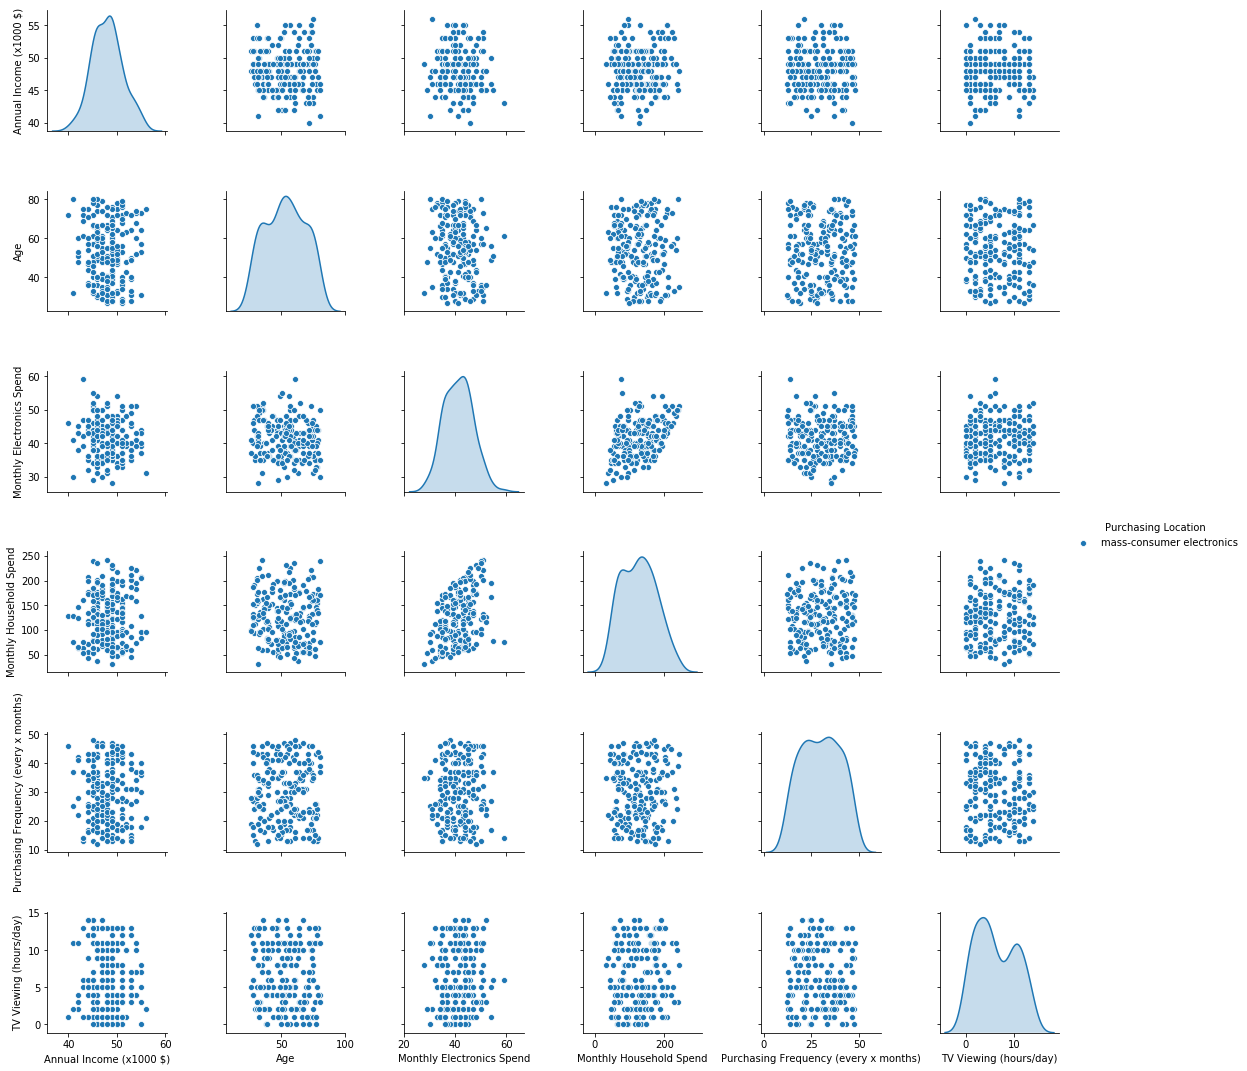

In [24]:
sb.pairplot(vp1.loc[:, vp1.columns != 'ID'],hue = "Purchasing Location")

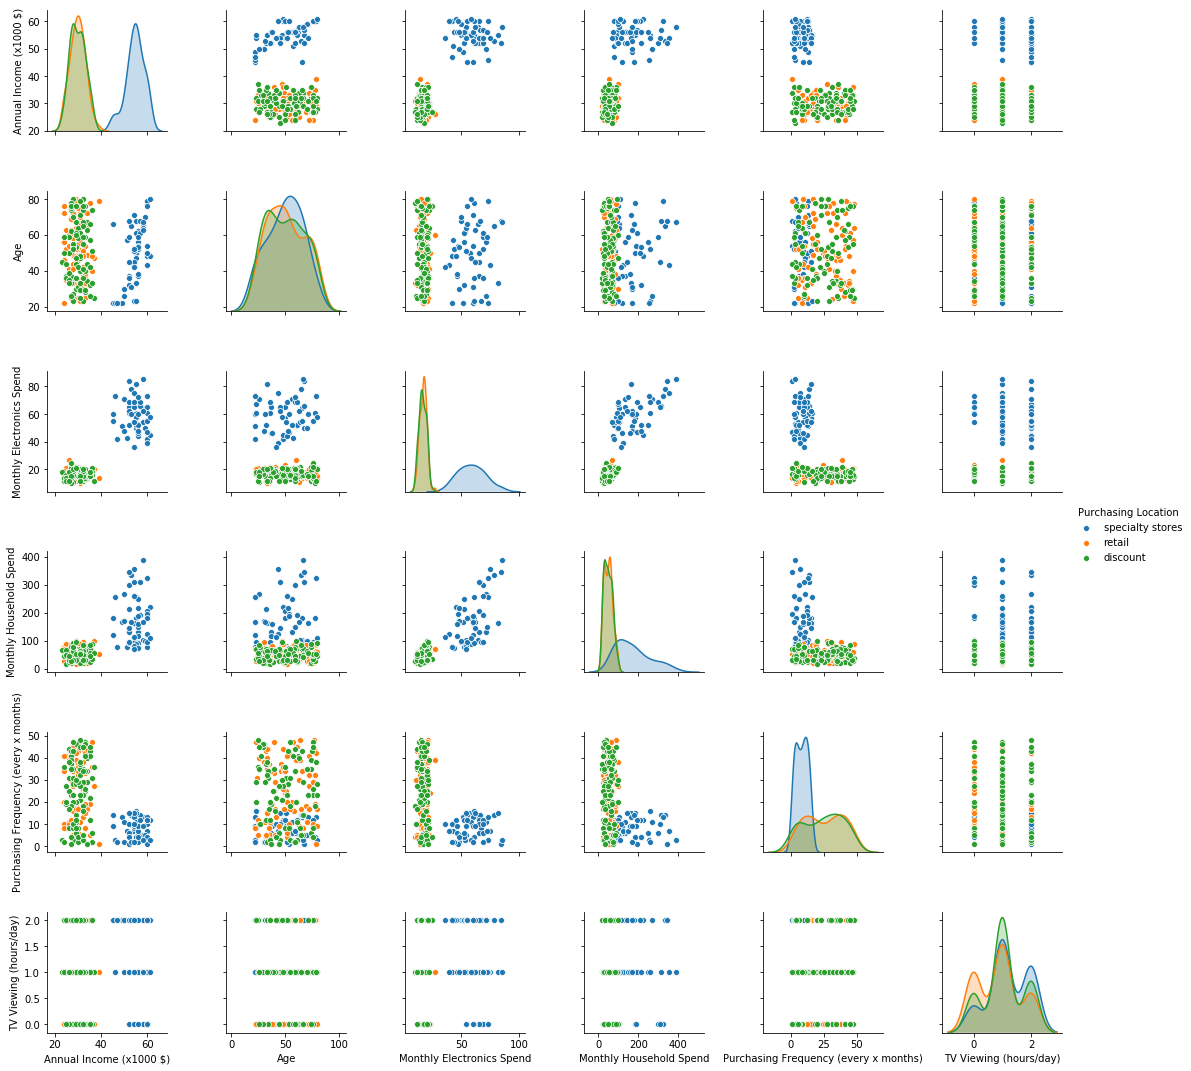

In [25]:
vp2 = df.loc[(df["Favorite feature"] == "time shifting")]
import seaborn as sb

sb.pairplot(vp2.loc[:, vp2.columns != 'ID'],hue = "Purchasing Location")

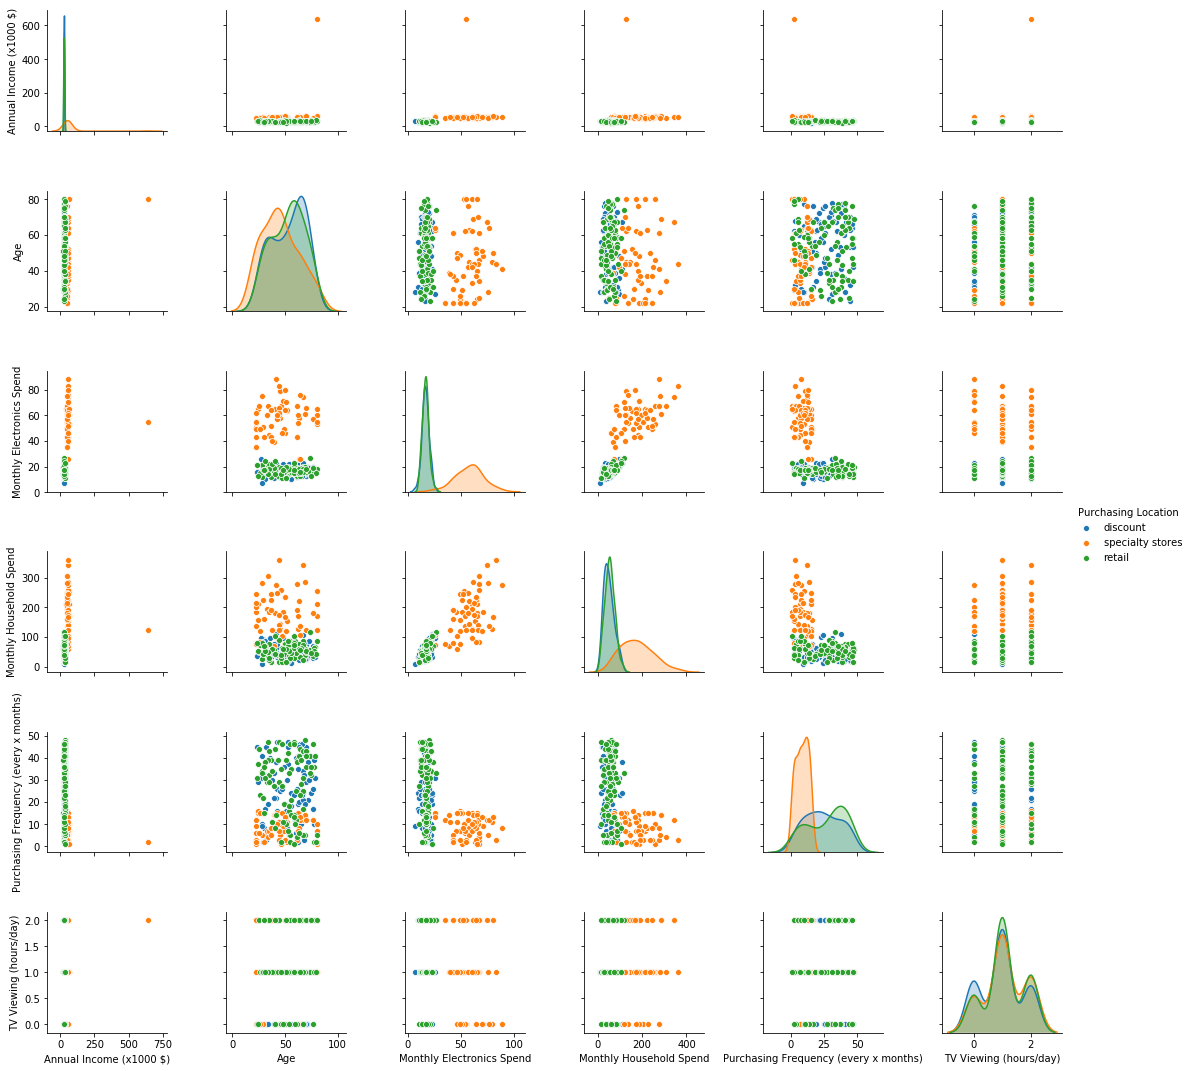

In [26]:
vp3 = df.loc[(df["Favorite feature"] == "cool gadget")]
import seaborn as sb

sb.pairplot(vp3.loc[:, vp3.columns != 'ID'],hue = "Purchasing Location")

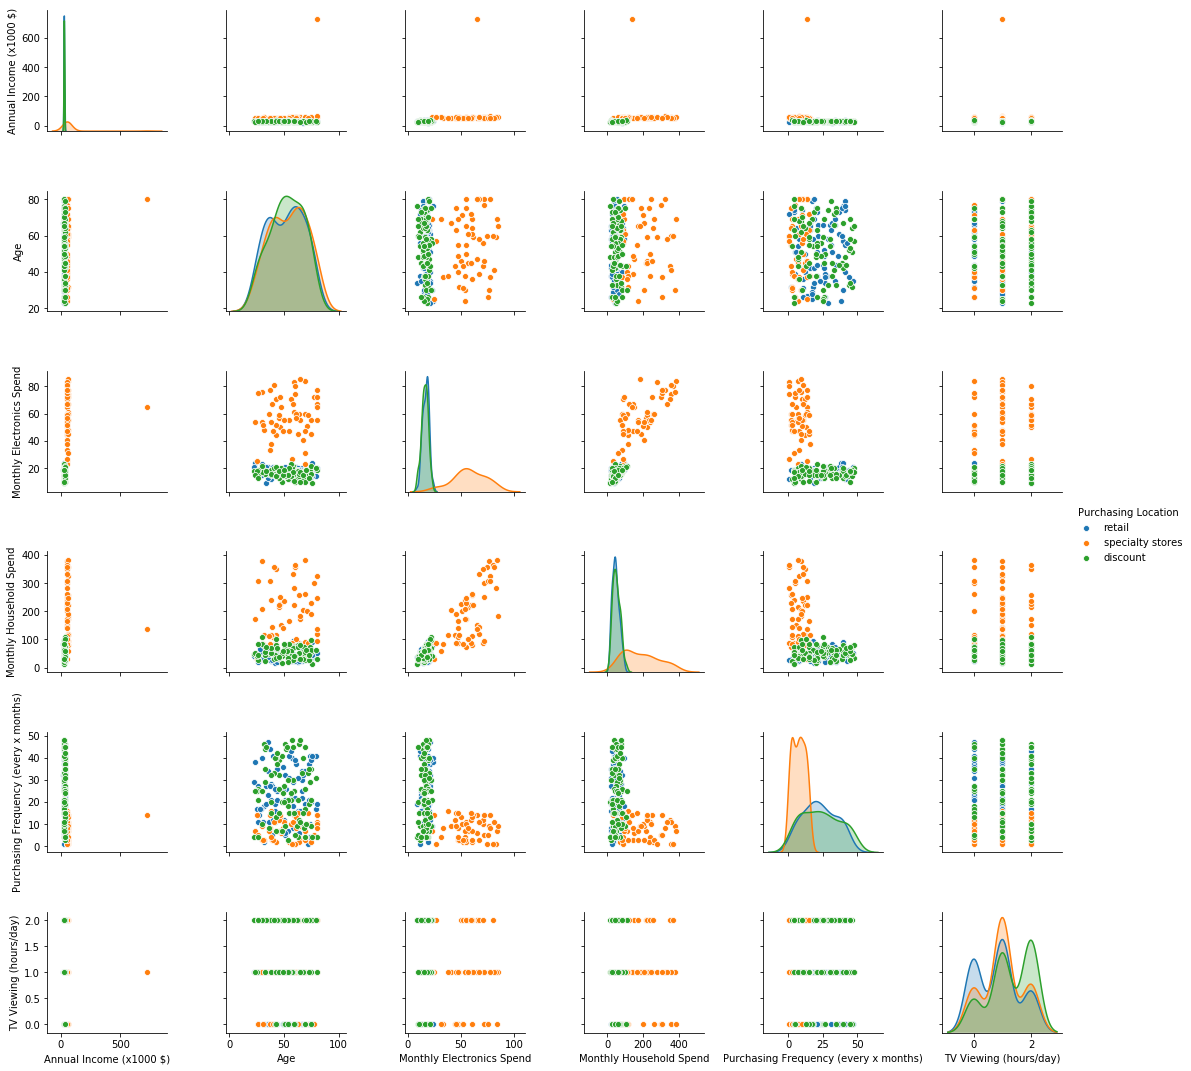

In [27]:
vp4 = df.loc[(df["Favorite feature"] == "schedule control")]
import seaborn as sb

sb.pairplot(vp4.loc[:, vp1.columns != 'ID'],hue = "Purchasing Location")

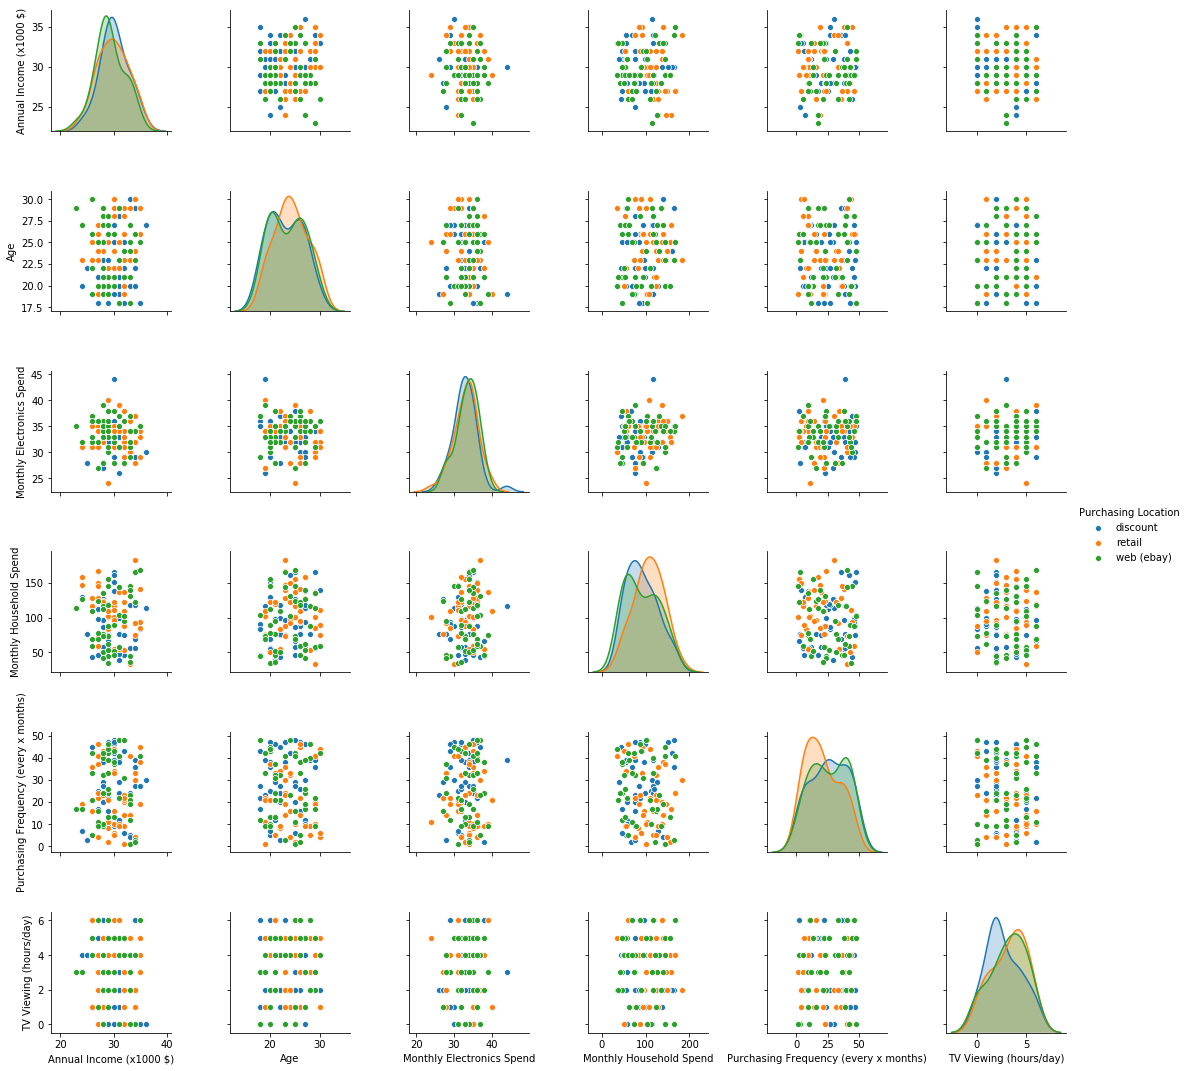

In [28]:
vp5 = df.loc[(df["Favorite feature"] == "programming/interactive features")]
import seaborn as sb

sb.pairplot(vp5.loc[:, vp5.columns != 'ID'],hue = "Purchasing Location")

# segmentation by Marriage

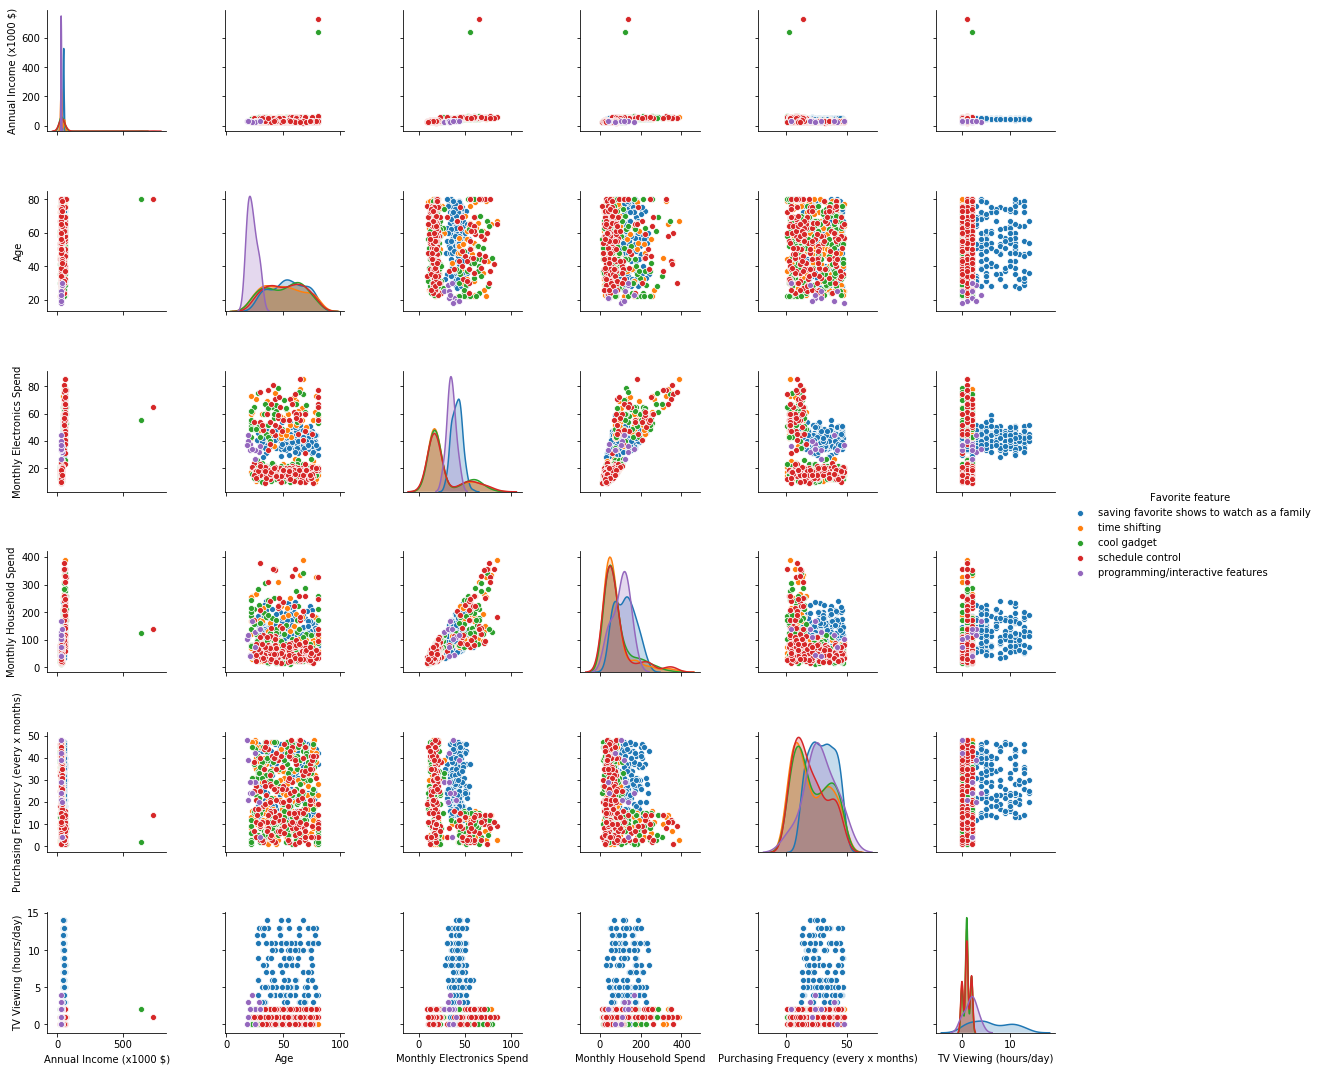

In [34]:
m1 = df.loc[(df["Marital Status"] == "married")]
import seaborn as sb

sb.pairplot(m1.loc[:, m1.columns != 'ID'],hue = "Favorite feature")

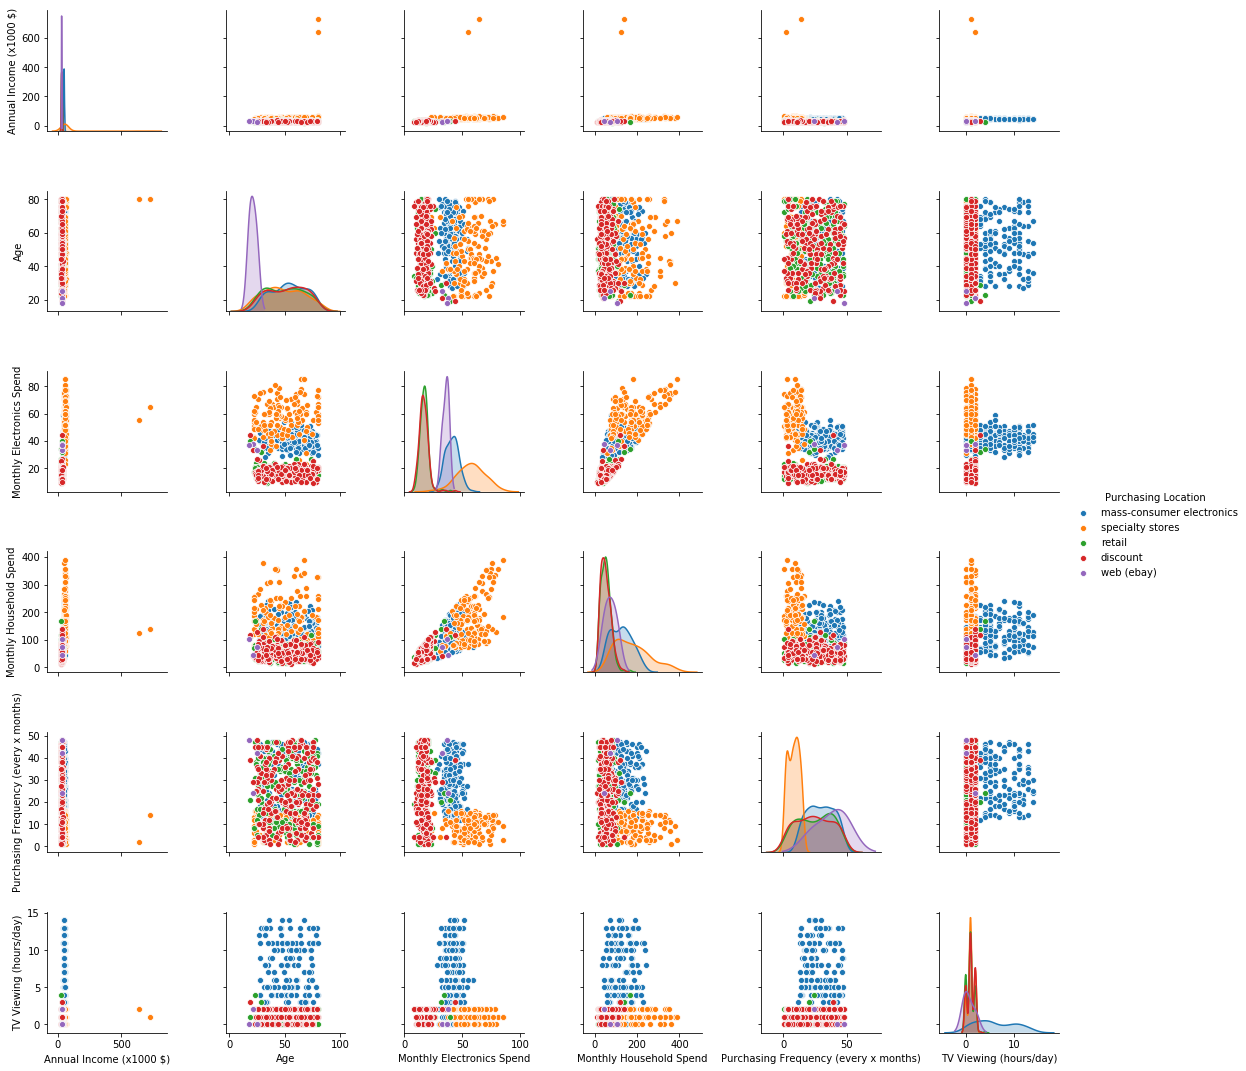

In [35]:

import seaborn as sb

sb.pairplot(m1.loc[:, m1.columns != 'ID'],hue = "Purchasing Location")

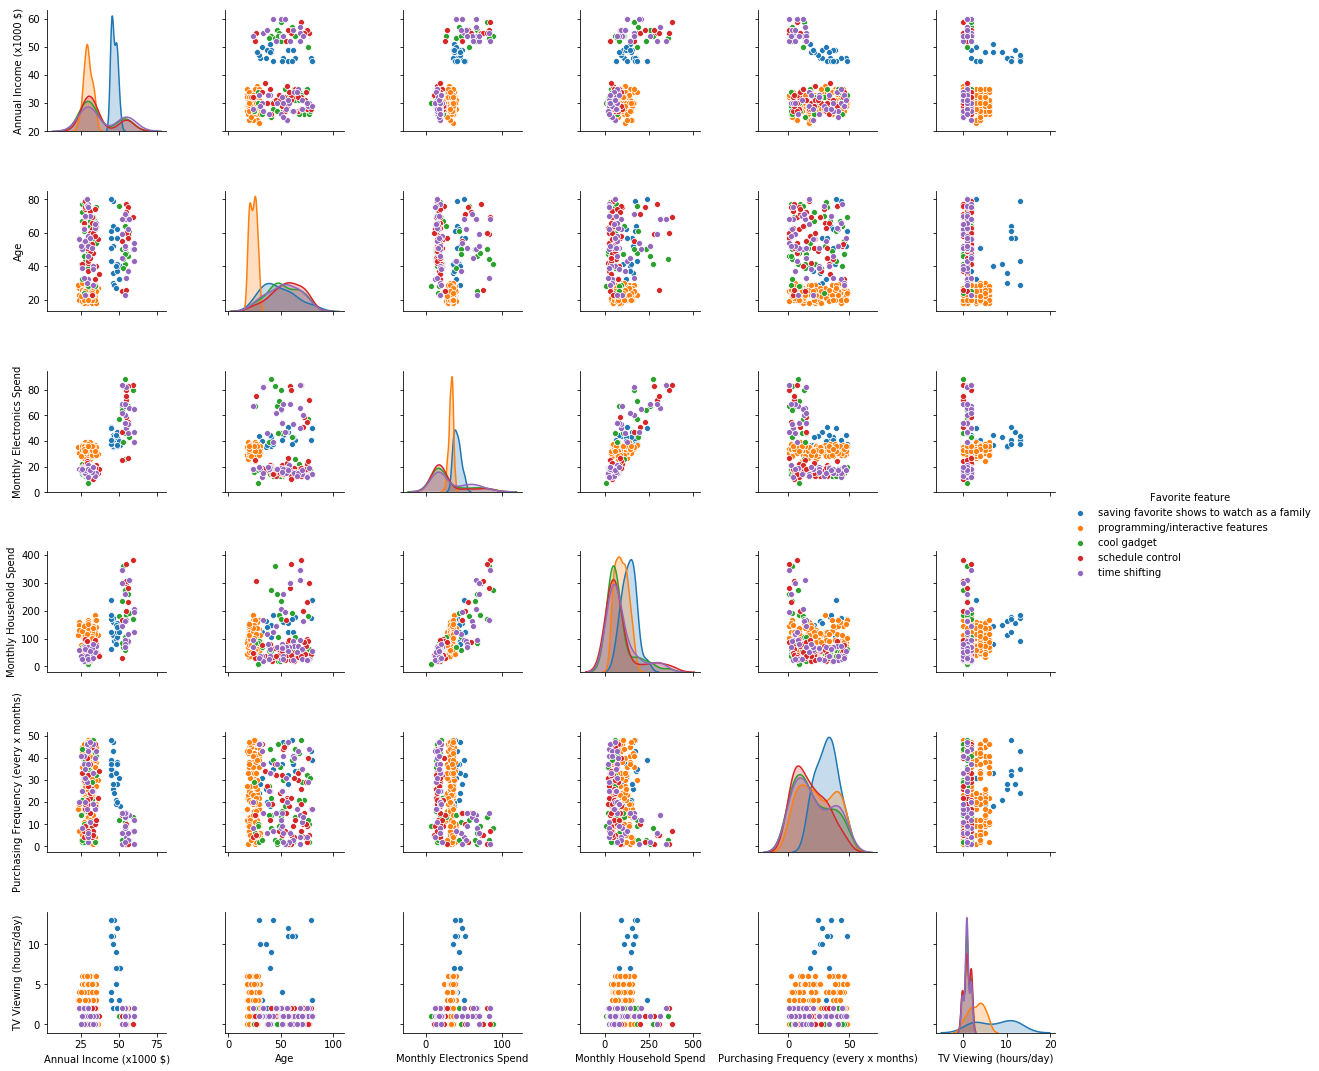

In [36]:
m2 = df.loc[(df["Marital Status"] == "single")]
import seaborn as sb

sb.pairplot(m2.loc[:, m2.columns != 'ID'],hue = "Favorite feature")

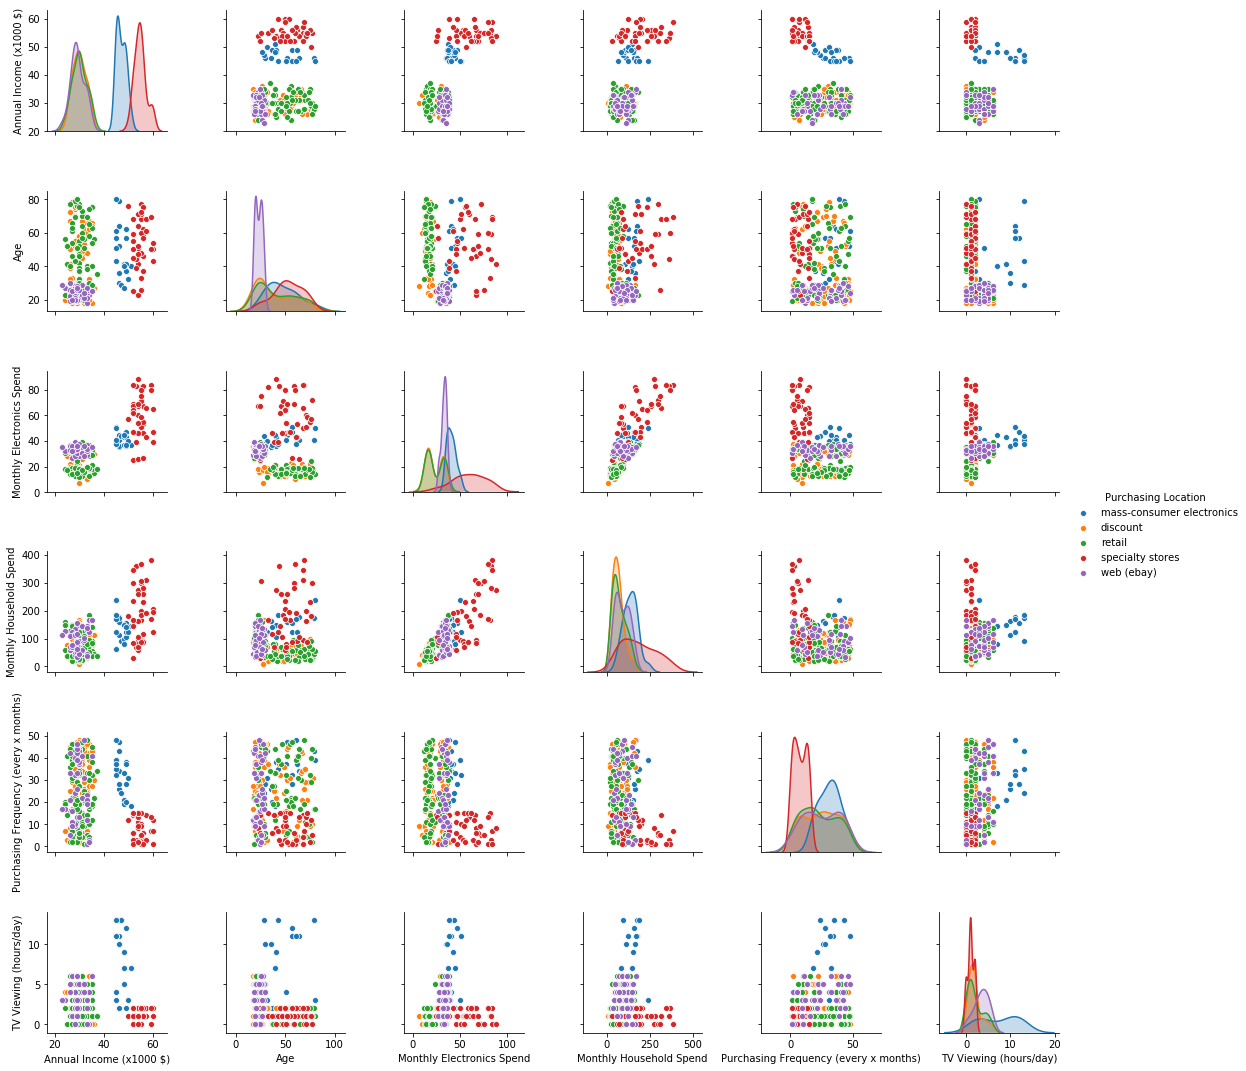

In [37]:
m2 = df.loc[(df["Marital Status"] == "single")]
import seaborn as sb

sb.pairplot(m2.loc[:, m2.columns != 'ID'],hue = "Purchasing Location")

# segmentation by Purchasing Location

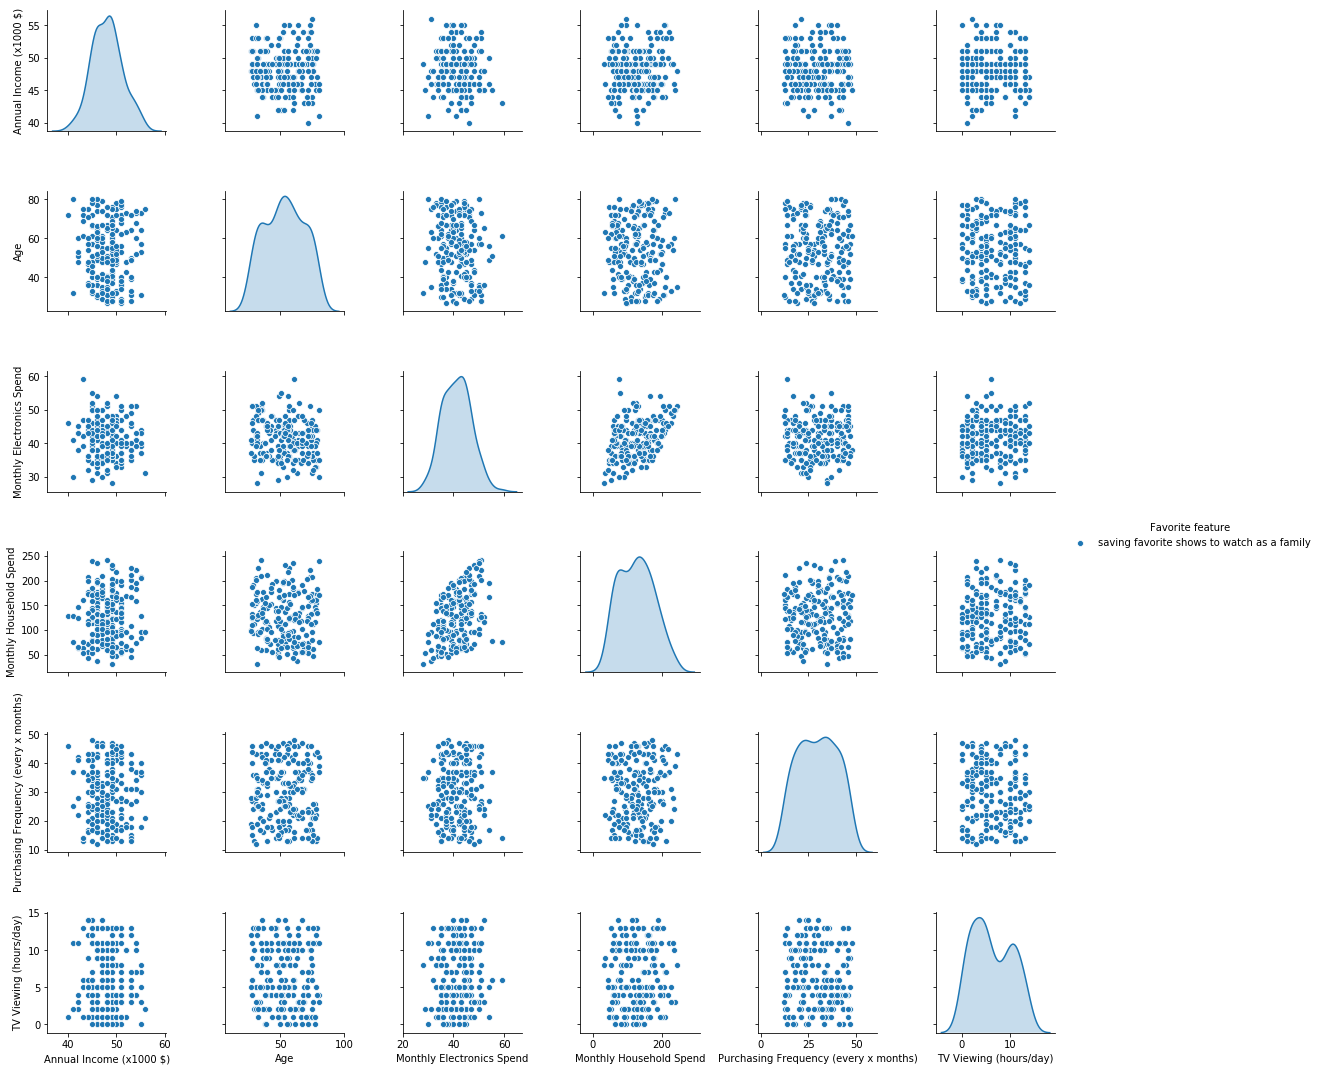

In [38]:
p1 = df.loc[(df["Purchasing Location"] == "mass-consumer electronics")]
import seaborn as sb

sb.pairplot(p1.loc[:, p1.columns != 'ID'],hue = "Favorite feature")
sb.pairplot(p1.loc[:, p1.columns != 'ID'],hue = "Favorite feature")

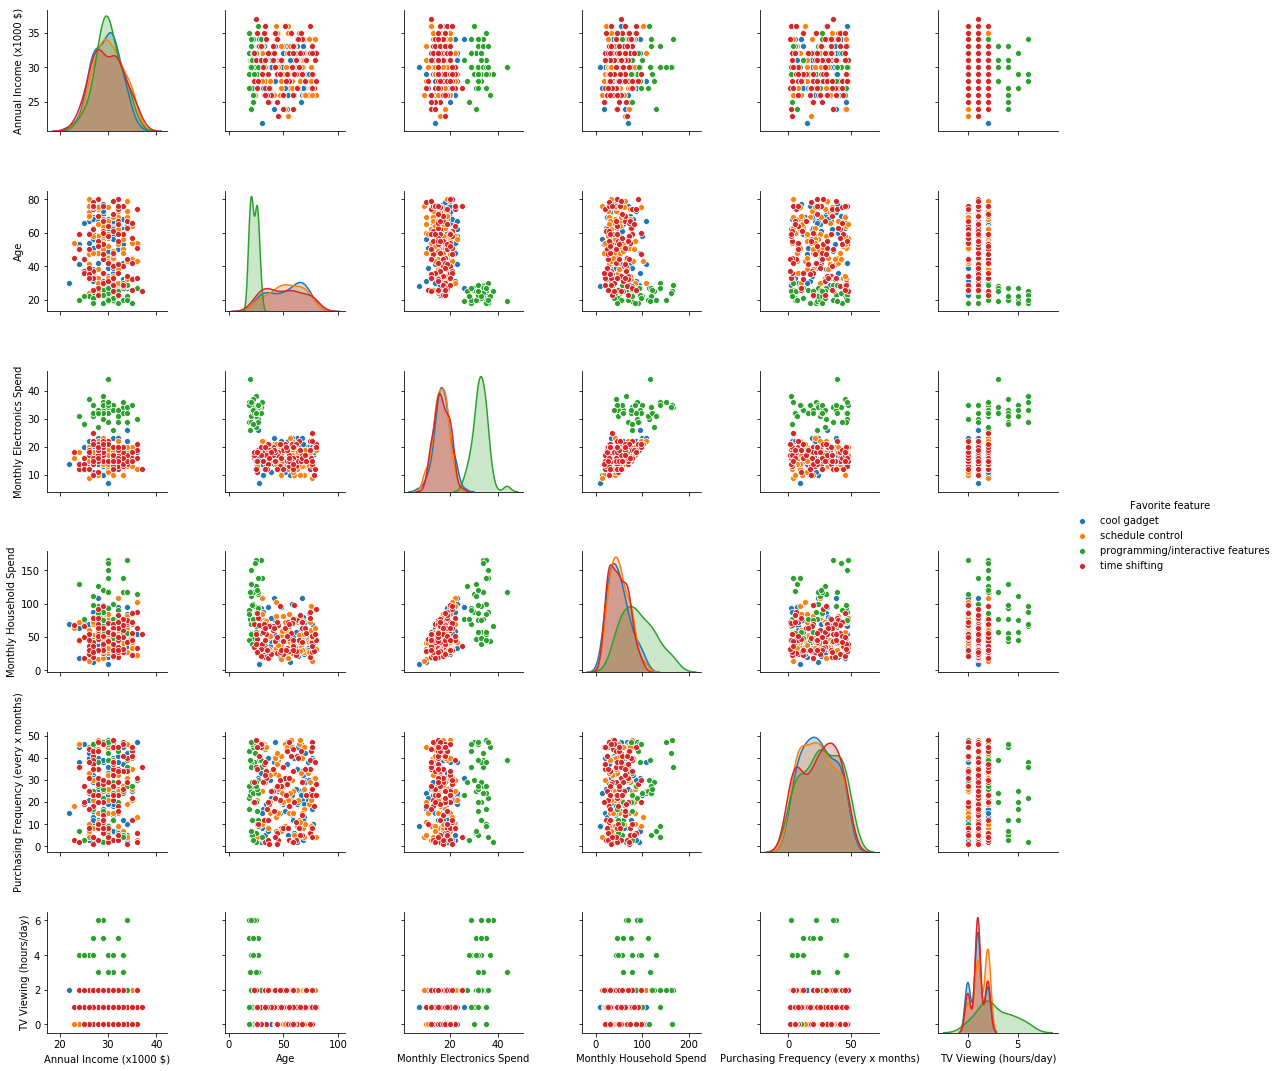

In [43]:
p2 = df.loc[(df["Purchasing Location"] == "discount")]
import seaborn as sb

sb.pairplot(p2.loc[:, p2.columns != 'ID'],hue = "Favorite feature")

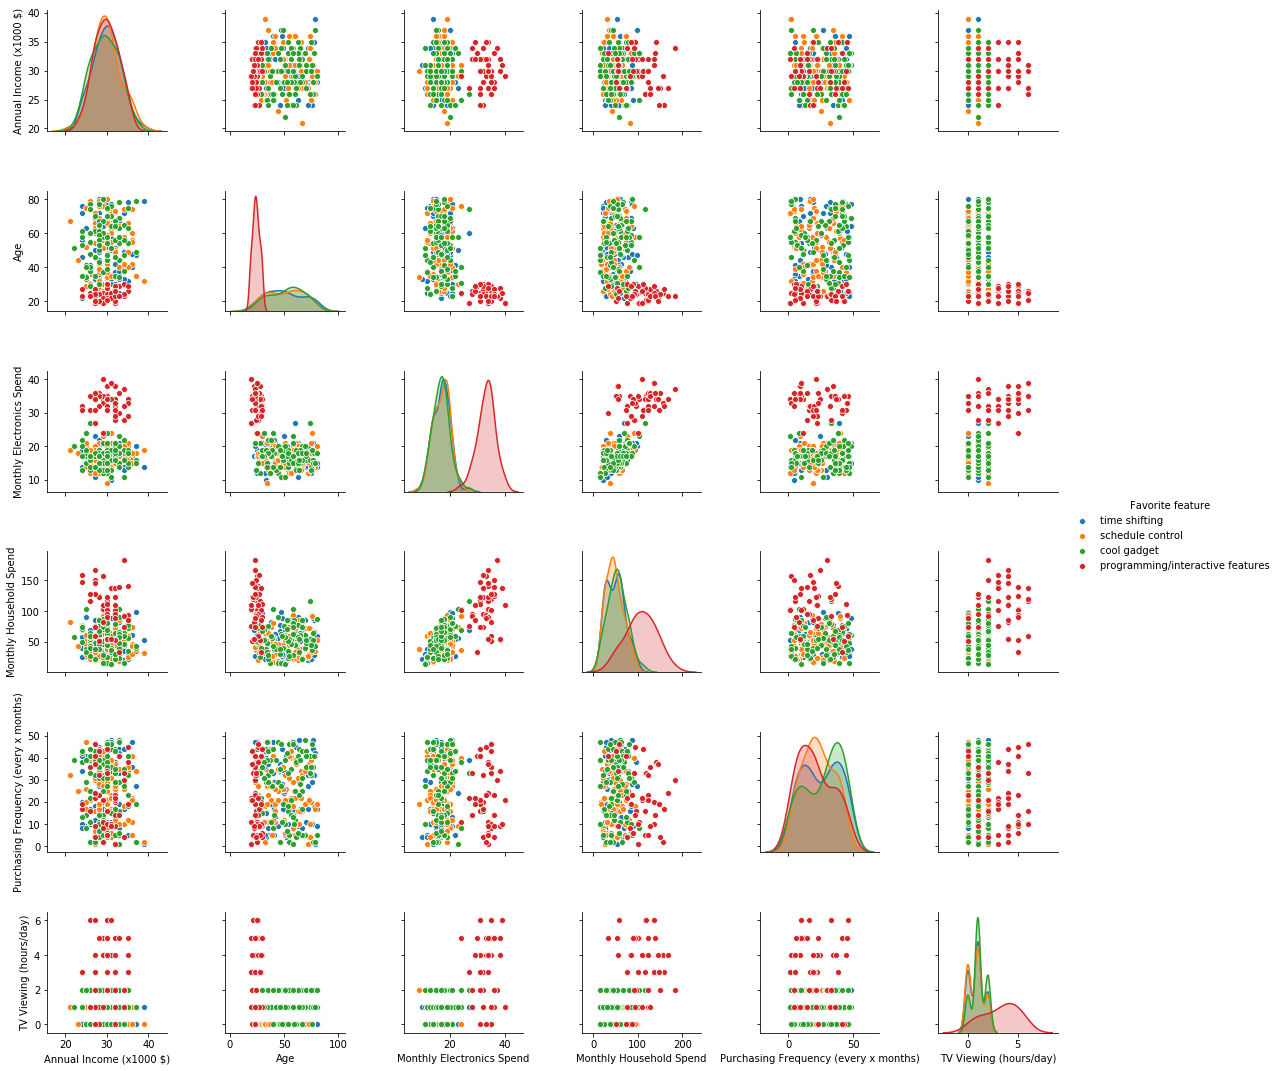

In [44]:
p3 = df.loc[(df["Purchasing Location"] == "retail")]
import seaborn as sb

sb.pairplot(p3.loc[:, p3.columns != 'ID'],hue = "Favorite feature")

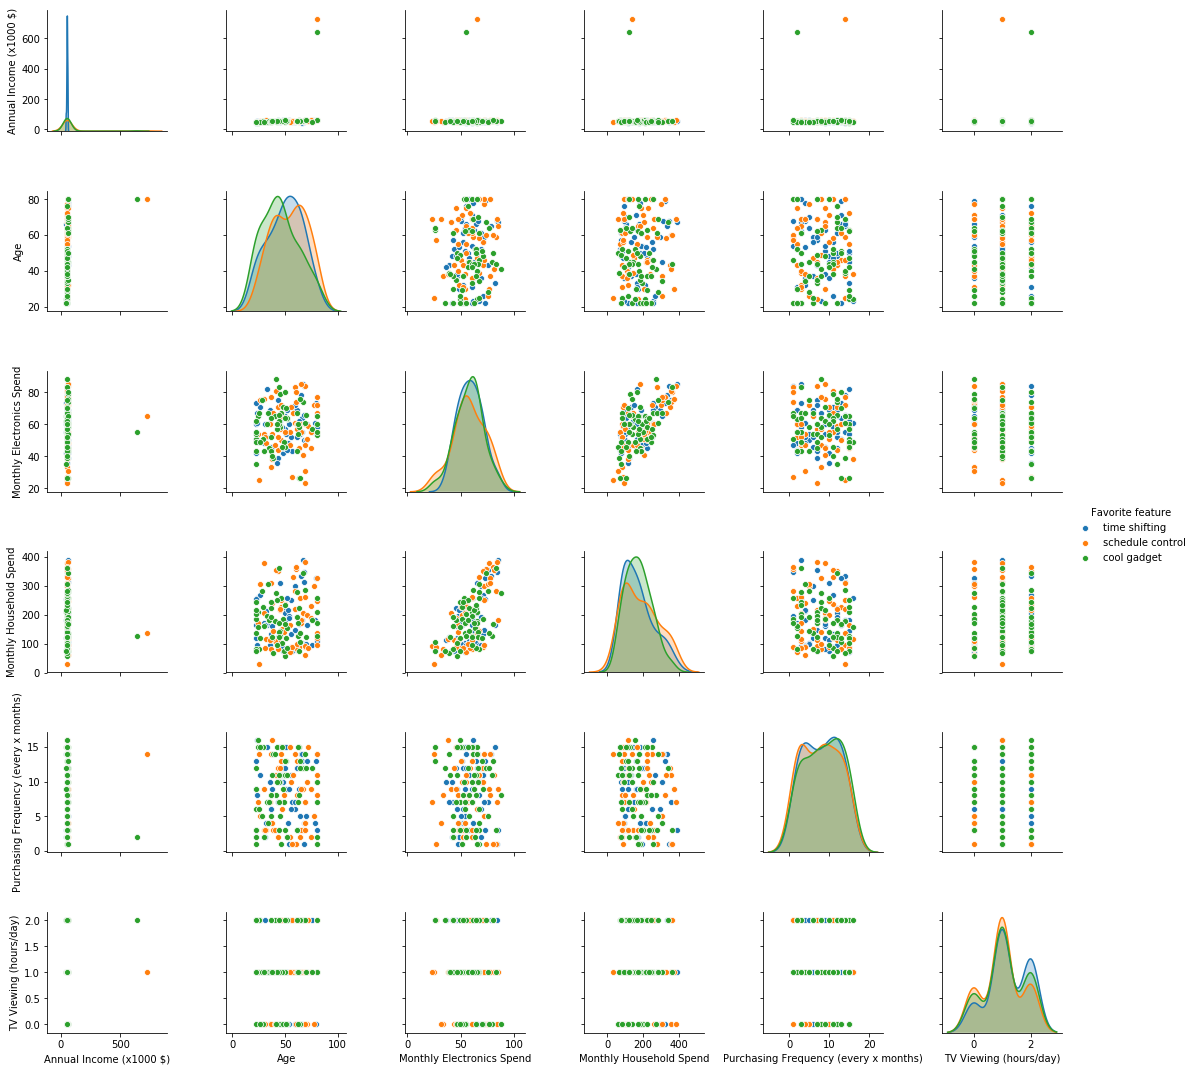

In [45]:
p4 = df.loc[(df["Purchasing Location"] == "specialty stores")]
import seaborn as sb

sb.pairplot(p4.loc[:, p4.columns != 'ID'],hue = "Favorite feature")

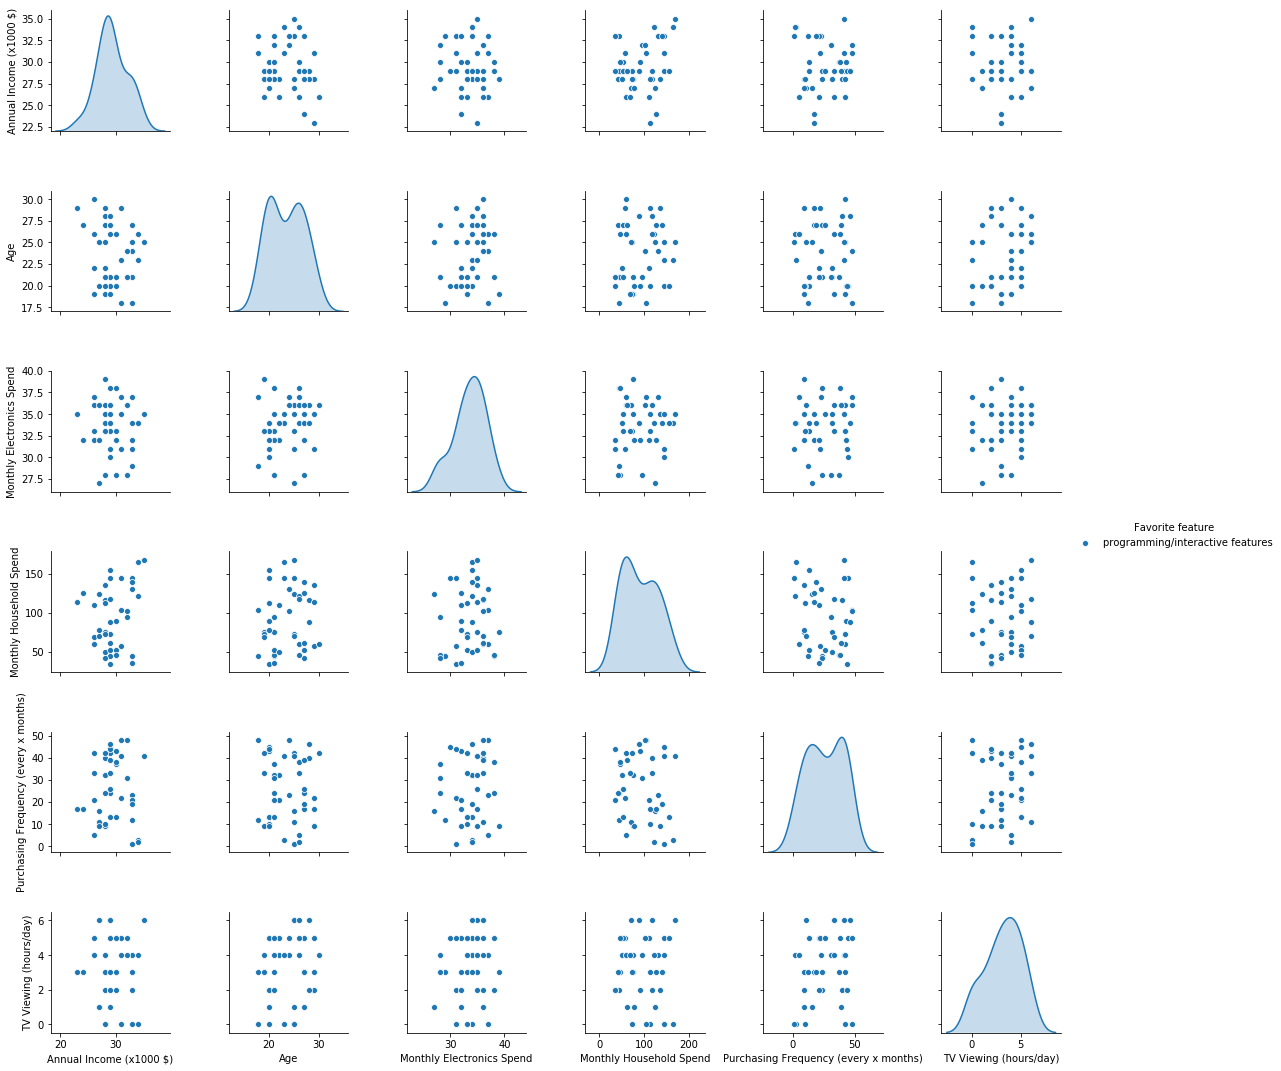

In [47]:
p5 = df.loc[(df["Purchasing Location"] == "web (ebay)")]
import seaborn as sb

sb.pairplot(p5.loc[:, p5.columns != 'ID'],hue = "Favorite feature")

# age and tv viewing

In [59]:
yl.head()

ID  Gender Marital Status   Work Status Education  \
0    1.0    male        married  professional      none   
7    8.0    male        married          none      none   
17  18.0  female        married  professional      none   
37  38.0  female        married  professional      none   
40  41.0  female         single  professional        MA   

    Annual Income (x1000 $)   Age       Location Purchasing Decision-maker  \
0                      49.0  30.0        Florida                    family   
7                      29.0  30.0  New Hampshire                    single   
17                     28.0  30.0          Maine                    family   
37                     28.0  24.0        Florida                    single   
40                     30.0  20.0       New York                    single   

          Purchasing Location  Monthly Electronics Spend  \
0   mass-consumer electronics                       35.0   
7                      retail                       23.0   
17                   discount                       14.0   
37                     retail                       17.0   
40                 web (ebay)                       32.0   

    Monthly Household Spend  Purchasing Frequency (every x months)  \
0                     150.0                                   13.0   
7                      75.0                                    9.0   
17                     66.0                                    8.0   
37                     40.0                                   31.0   
40                     90.0                                   43.0   

   Technology Adoption  TV Viewing (hours/day)  \
0                 late                     2.0   
7                early                     1.0   
17               early                     2.0   
37               early                     0.0   
40               early                     2.0   

                              Favorite feature  
0   saving favorite shows to watch as a family  
7                             schedule control  
17                                 cool gadget  
37                               time shifting  
40            programming/interactive features

In [62]:
yl["Favorite feature"].value_counts()

programming/interactive features              52
cool gadget                                   33
time shifting                                 28
schedule control                              23
saving favorite shows to watch as a family     1
Name: Favorite feature, dtype: int64

In [63]:
yl[yl["Favorite feature"] == "saving favorite shows to watch as a family"]

ID Gender Marital Status   Work Status Education  Annual Income (x1000 $)  \
0  1.0   male        married  professional      none                     49.0   

    Age Location Purchasing Decision-maker        Purchasing Location  \
0  30.0  Florida                    family  mass-consumer electronics   

   Monthly Electronics Spend  Monthly Household Spend  \
0                       35.0                    150.0   

   Purchasing Frequency (every x months) Technology Adoption  \
0                                   13.0                late   

   TV Viewing (hours/day)                            Favorite feature  
0                     2.0  saving favorite shows to watch as a family

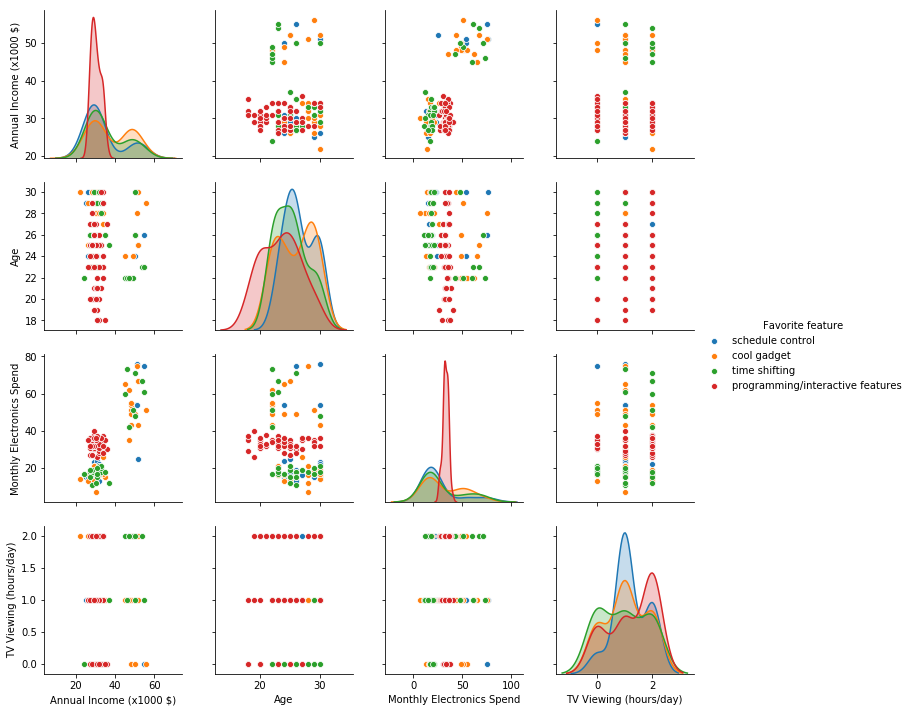

In [64]:
sb.pairplot(data = yl[1:], vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Favorite feature")

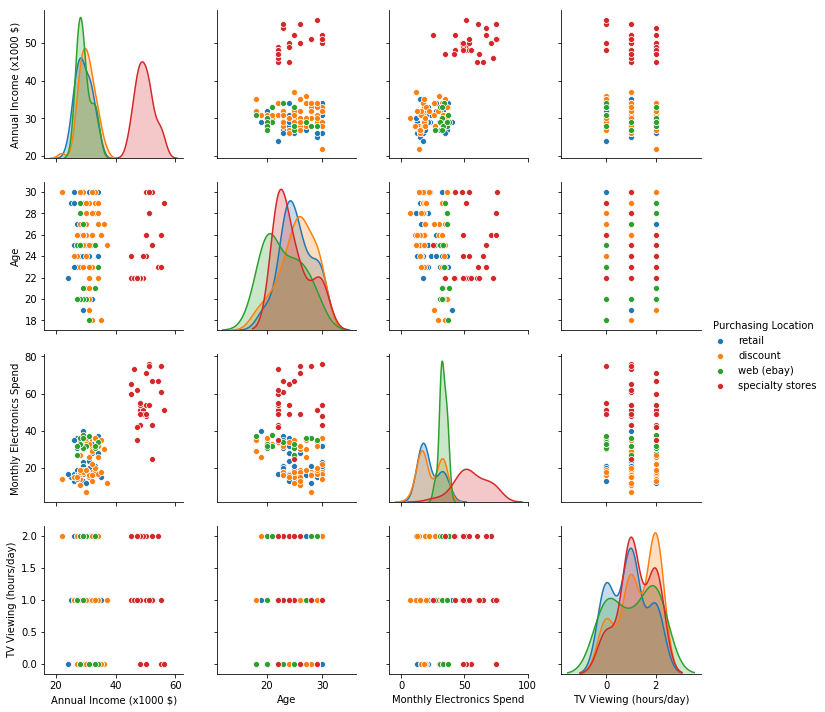

In [65]:
sb.pairplot(data = yl[1:], vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")

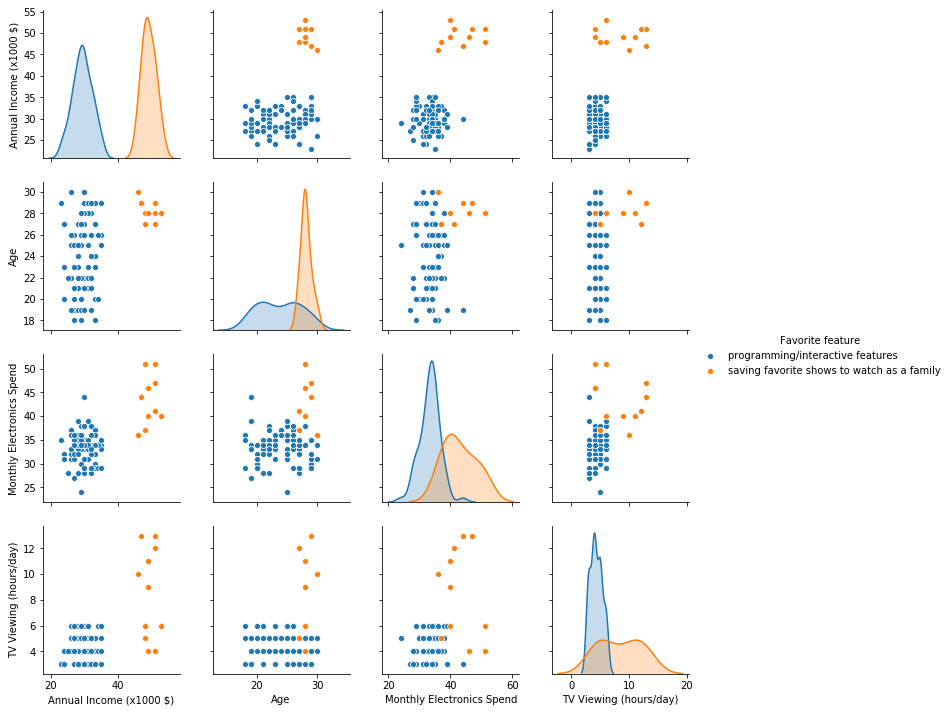

In [66]:
sb.pairplot(data = yh, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Favorite feature")

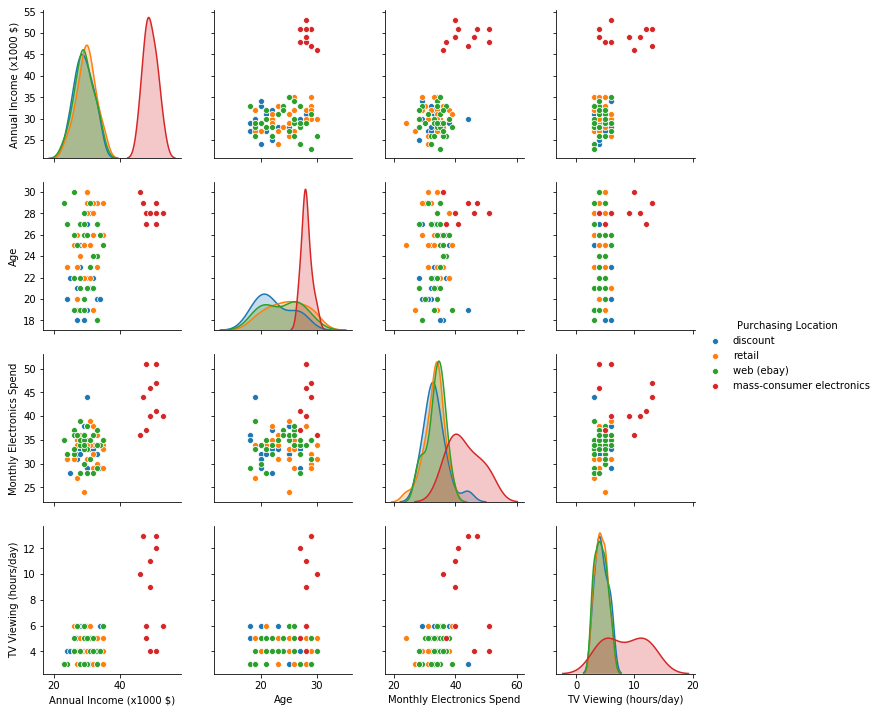

In [67]:
sb.pairplot(data = yh, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")sb.pairplot(data = yh, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")

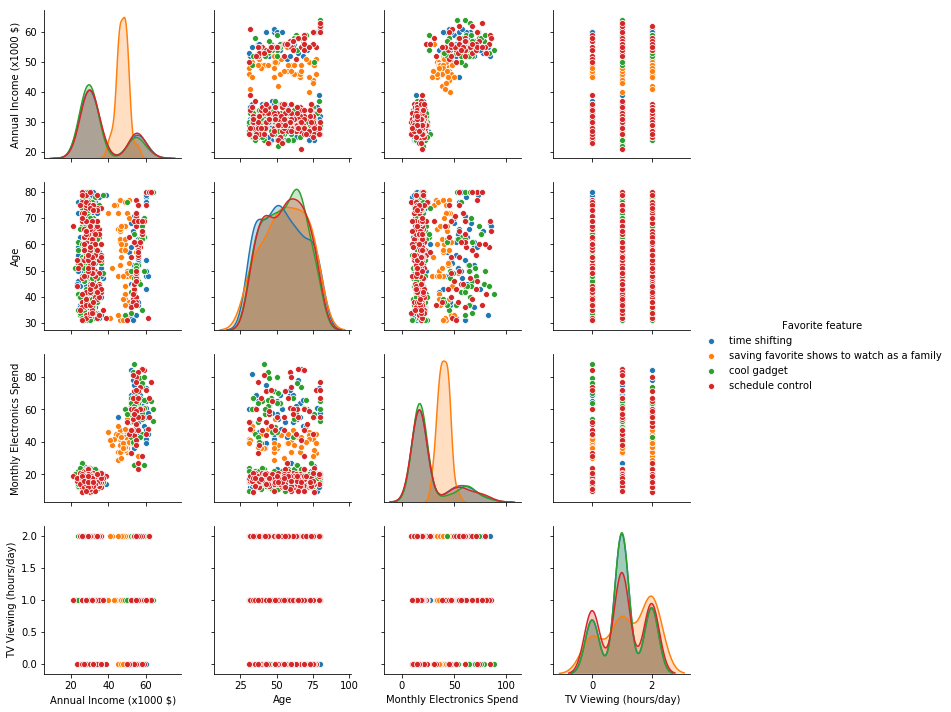

In [68]:
sb.pairplot(data = ol, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Favorite feature")

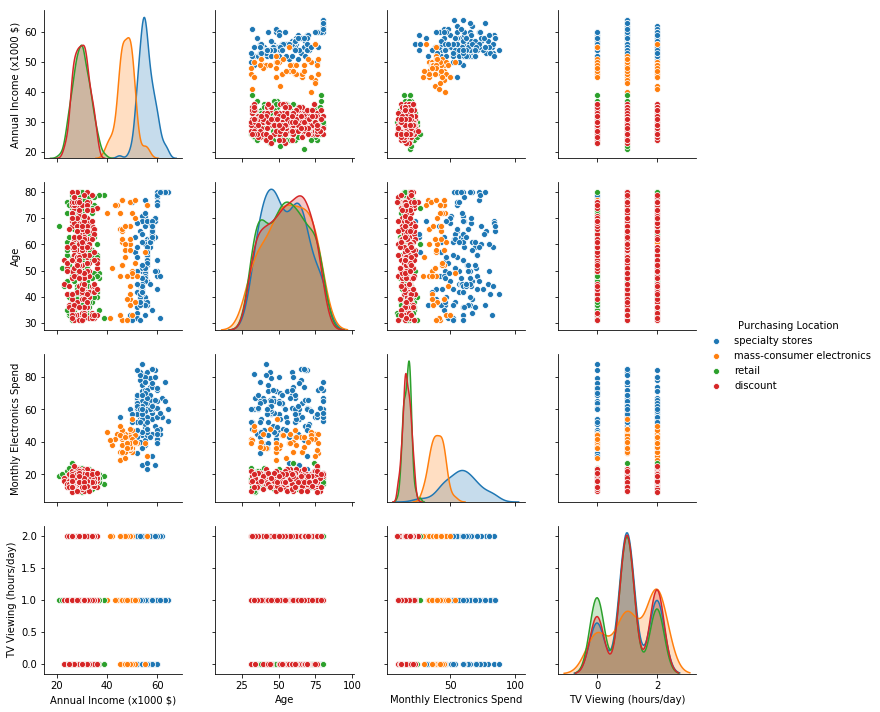

In [69]:
sb.pairplot(data = ol, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")

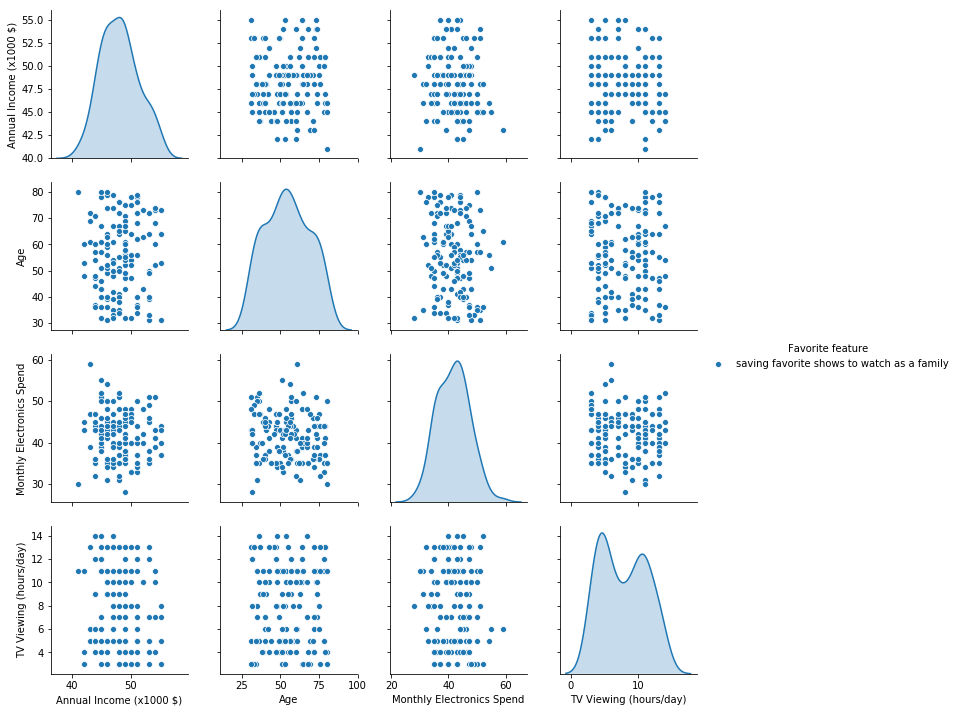

In [70]:
sb.pairplot(data = oh, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Favorite feature")

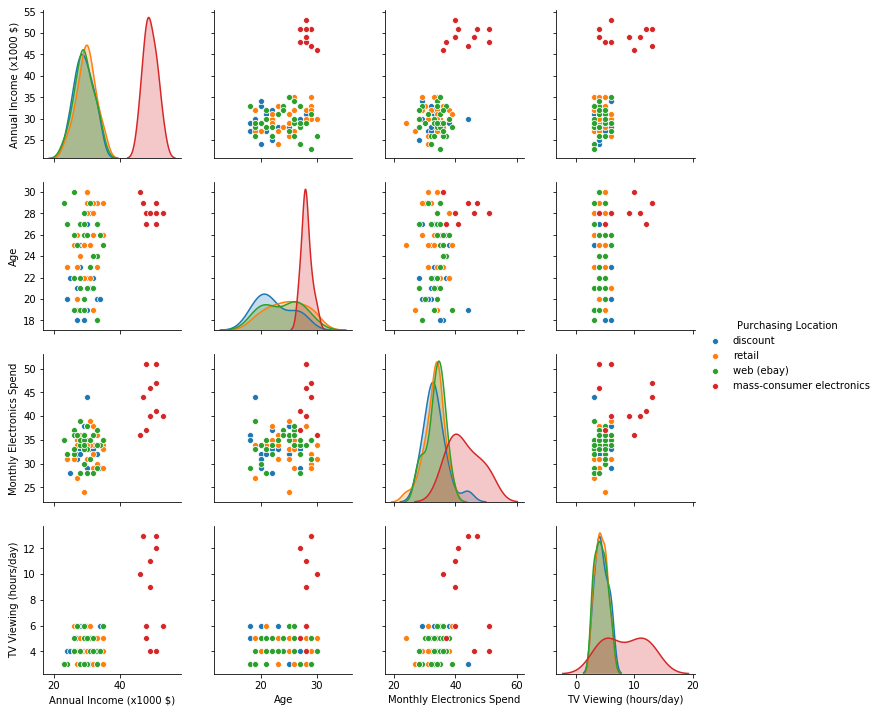

In [71]:
sb.pairplot(data = yh, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")

# segmentation by early vs late

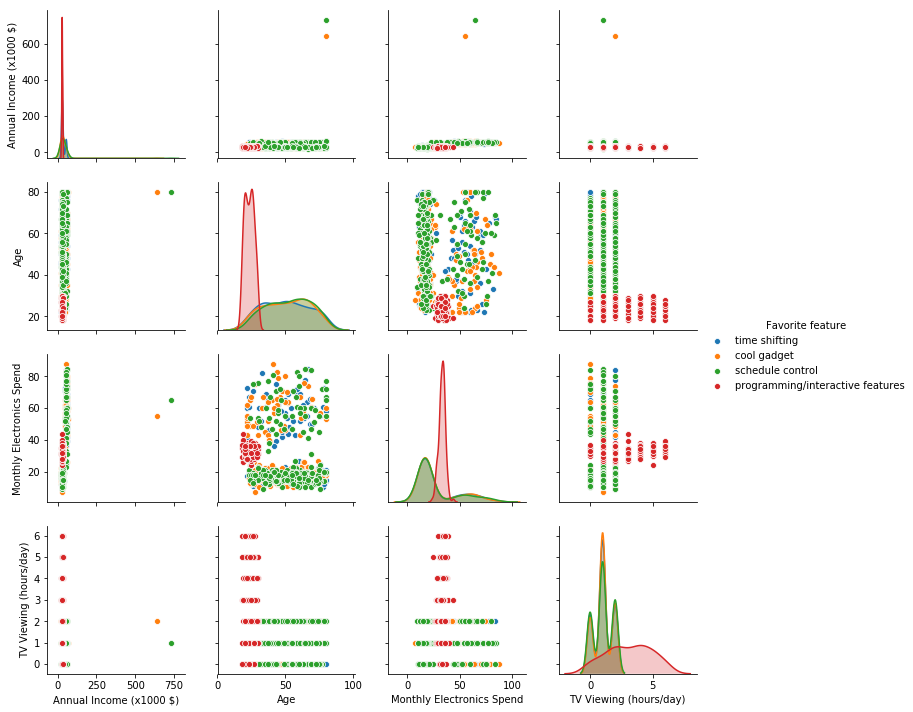

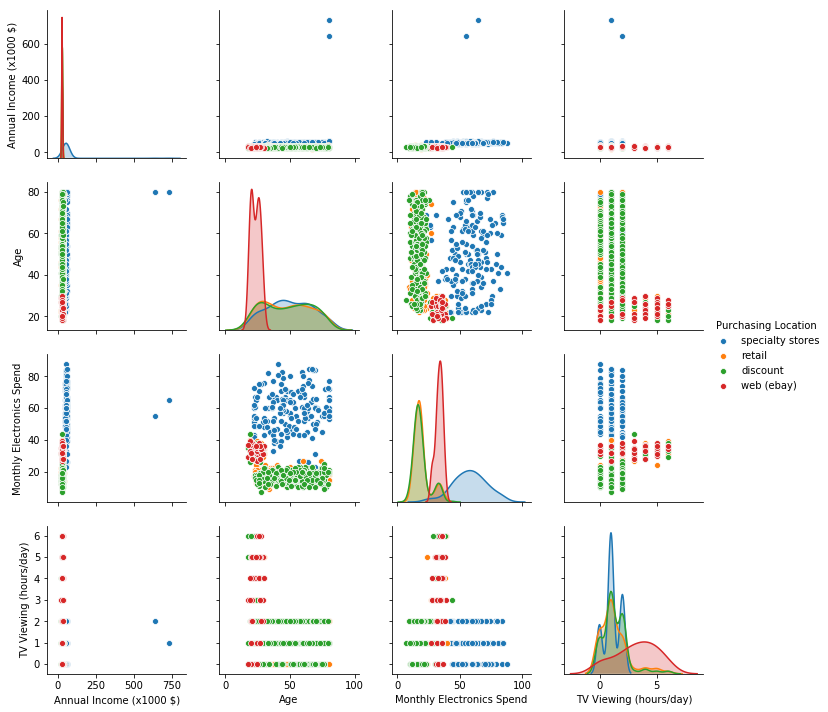

In [72]:
early = df.loc[(df["Technology Adoption"] == "early")]
sb.pairplot(data = early, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Favorite feature")
sb.pairplot(data = early, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")

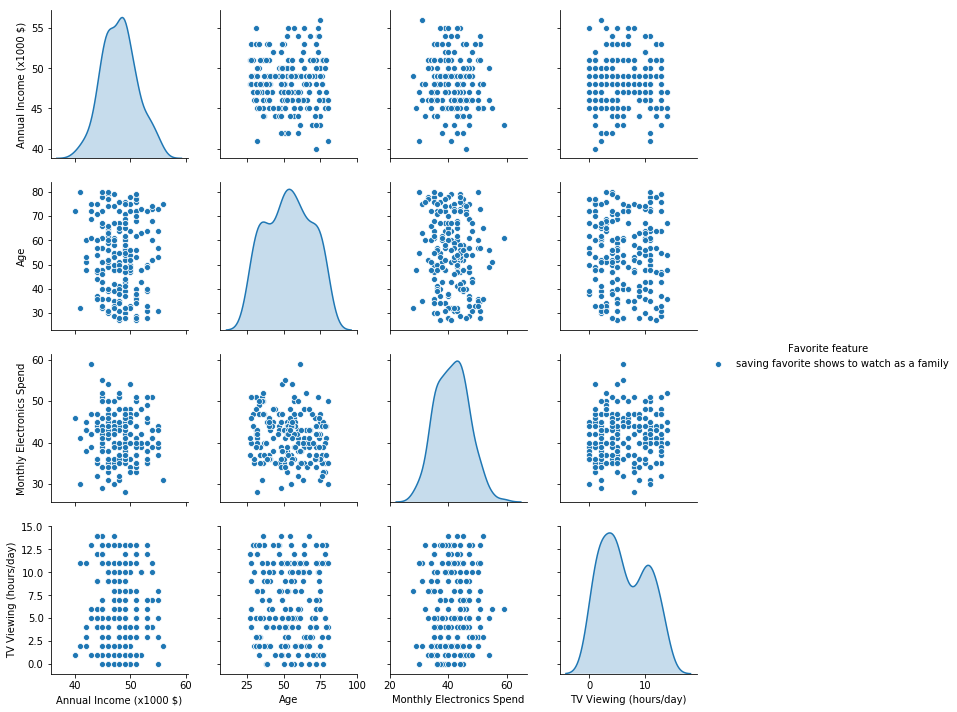

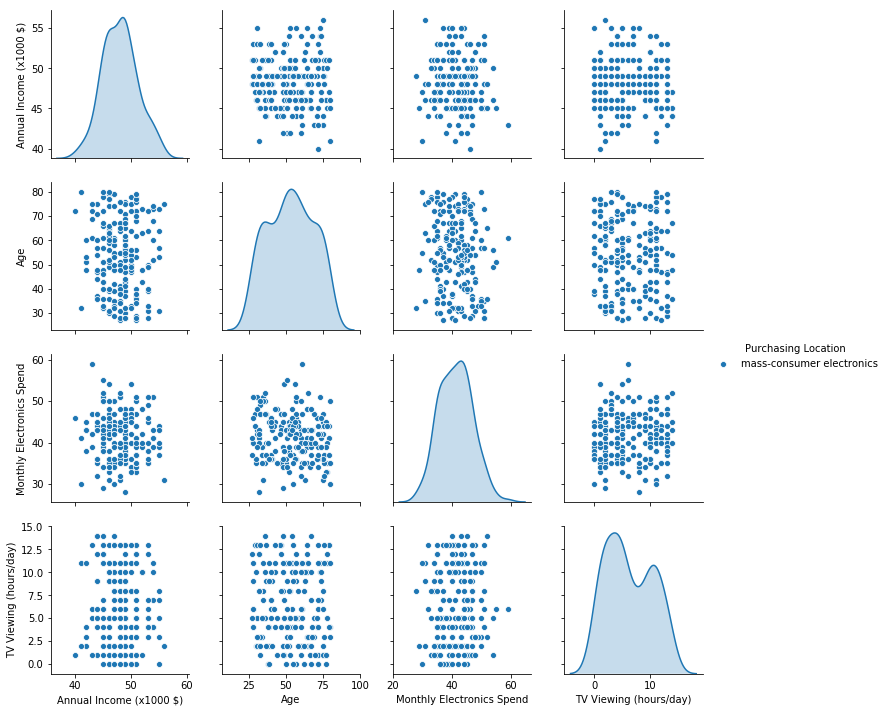

In [73]:
late = df.loc[(df["Technology Adoption"] == "late")]
sb.pairplot(data = late, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Favorite feature")
sb.pairplot(data = late, vars = ["Annual Income (x1000 $)","Age","Monthly Electronics Spend","TV Viewing (hours/day)"], hue="Purchasing Location")